In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

%matplotlib notebook

In [2]:
exp_dir = '/home/manor/anaconda3/envs/openAIenv/baselines/models/BreakoutNoFrameskip-v4_4e7_a2c_exp_2019-09-28_11-00-00'
obs_dir = os.path.join(exp_dir, 'obs_dir')
other_dir = os.path.join(exp_dir, 'other_info')
exp_dir = os.path.abspath(exp_dir)
obs_dir = os.path.abspath(obs_dir)
other_dir = os.path.abspath(other_dir)
assert os.path.exists(exp_dir)
assert os.path.exists(obs_dir)
assert os.path.exists(other_dir)

os.chdir(exp_dir)

In [3]:
obs = []
for obs_file in os.listdir(obs_dir):
    obs.append(np.load(os.path.join(obs_dir, obs_file)))
    
obs = np.concatenate([o for o in obs], axis=0)
print("[t-SNE GEN] - obs shape : {}, obs dtype: {}".format(obs.shape, obs.dtype))

[t-SNE GEN] - obs shape : (26542, 84, 84, 4), obs dtype: uint8


In [4]:
def get_max_tunnel_depth(obs=None, method=cv2.TM_CCOEFF_NORMED):
    """
    return the avg. location of the padel over 4 consequtive observations
    obs: np.ndarray.shape = (3,74). obs is the buttom part of the image, where the padel is.
                                    we assume only the last frame in each observation as the
                                    relevant for the current location (the others are there to give the
                                    network a sense of motion).
    method: string in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                       cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    """
    assert obs is not None
    assert obs.shape[0] == 14 and obs.shape[1] == 75
    all_depths = []
    for i in range(obs.shape[1]):
        depth_per_column = 0
        for j in reversed(range(obs.shape[0])):
            if obs[j,i] != 0:
                break
            else:
                depth_per_column += 1
        all_depths.append(depth_per_column)
    
    if len([x for x in all_depths if x != 0]) > 0:
        max_depth = max(all_depths)
    else:
        max_depth = 0
    
#     print(all_depths)
    
    tunnel_open = max_depth == obs.shape[0]
    
        
    return max_depth, tunnel_open, all_depths

(14, 75)


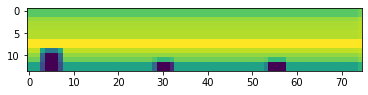

In [5]:
fig,axes = plt.subplots()
axes.imshow(obs[150,23:37,5:80,3])
print(obs[150,23:37,5:80,3].shape)

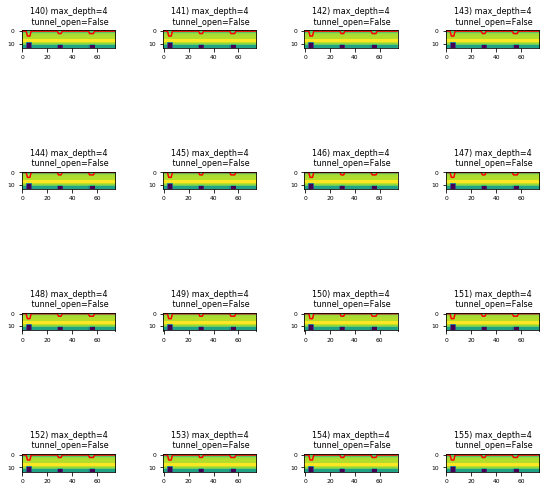

In [6]:
fig,axes = plt.subplots(4,4, figsize=(8,8))
fig.tight_layout()
for i in range(16):
    idx = 140+i
    obs_f = obs[idx,:,:,3]
    obs_s = obs_f[23:37,5:80]
    max_depth, tunnel_open, all_depth = get_max_tunnel_depth(obs_s,cv2.TM_CCORR_NORMED)
    axes[int(i/4),int(i%4)].imshow(obs_s)
    axes[int(i/4),int(i%4)].plot(all_depth, color='red')
    axes[int(i/4),int(i%4)].set_title('{}) max_depth={}\n tunnel_open={}'.format(idx, max_depth,tunnel_open), fontsize=8)
    axes[int(i/4),int(i%4)].tick_params(axis='both', which='major', labelsize=6)
    
#     if idx == 1515:
#         break

In [7]:
depth = []
is_open = []
for i in range(obs.shape[0]):
    obs_f = obs[i,:,:,3]
    obs_s = obs_f[23:37,5:80]
    max_depth, tunnel_open, all_depth = get_max_tunnel_depth(obs_s,cv2.TM_CCORR_NORMED)
    print('{}) max_depth={} tunnel_open={}'.format(i, max_depth,tunnel_open))
    depth.append(max_depth)
    is_open.append(tunnel_open)

np.save(os.path.join(exp_dir, "tunnel_depth.npy"), np.array(depth))
np.save(os.path.join(exp_dir, "tunnel_is_open.npy"), np.array(is_open))

0) max_depth=0 tunnel_open=False
1) max_depth=0 tunnel_open=False
2) max_depth=0 tunnel_open=False
3) max_depth=0 tunnel_open=False
4) max_depth=0 tunnel_open=False
5) max_depth=0 tunnel_open=False
6) max_depth=0 tunnel_open=False
7) max_depth=0 tunnel_open=False
8) max_depth=0 tunnel_open=False
9) max_depth=0 tunnel_open=False
10) max_depth=0 tunnel_open=False
11) max_depth=0 tunnel_open=False
12) max_depth=0 tunnel_open=False
13) max_depth=0 tunnel_open=False
14) max_depth=0 tunnel_open=False
15) max_depth=0 tunnel_open=False
16) max_depth=0 tunnel_open=False
17) max_depth=0 tunnel_open=False
18) max_depth=0 tunnel_open=False
19) max_depth=0 tunnel_open=False
20) max_depth=0 tunnel_open=False
21) max_depth=0 tunnel_open=False
22) max_depth=0 tunnel_open=False
23) max_depth=0 tunnel_open=False
24) max_depth=0 tunnel_open=False
25) max_depth=0 tunnel_open=False
26) max_depth=0 tunnel_open=False
27) max_depth=0 tunnel_open=False
28) max_depth=2 tunnel_open=False
29) max_depth=2 tunnel_o

1444) max_depth=14 tunnel_open=True
1445) max_depth=14 tunnel_open=True
1446) max_depth=14 tunnel_open=True
1447) max_depth=14 tunnel_open=True
1448) max_depth=14 tunnel_open=True
1449) max_depth=14 tunnel_open=True
1450) max_depth=14 tunnel_open=True
1451) max_depth=14 tunnel_open=True
1452) max_depth=14 tunnel_open=True
1453) max_depth=14 tunnel_open=True
1454) max_depth=14 tunnel_open=True
1455) max_depth=14 tunnel_open=True
1456) max_depth=14 tunnel_open=True
1457) max_depth=14 tunnel_open=True
1458) max_depth=14 tunnel_open=True
1459) max_depth=14 tunnel_open=True
1460) max_depth=14 tunnel_open=True
1461) max_depth=14 tunnel_open=True
1462) max_depth=14 tunnel_open=True
1463) max_depth=14 tunnel_open=True
1464) max_depth=14 tunnel_open=True
1465) max_depth=14 tunnel_open=True
1466) max_depth=14 tunnel_open=True
1467) max_depth=14 tunnel_open=True
1468) max_depth=14 tunnel_open=True
1469) max_depth=14 tunnel_open=True
1470) max_depth=14 tunnel_open=True
1471) max_depth=14 tunnel_op

1897) max_depth=14 tunnel_open=True
1898) max_depth=14 tunnel_open=True
1899) max_depth=14 tunnel_open=True
1900) max_depth=14 tunnel_open=True
1901) max_depth=14 tunnel_open=True
1902) max_depth=14 tunnel_open=True
1903) max_depth=14 tunnel_open=True
1904) max_depth=14 tunnel_open=True
1905) max_depth=14 tunnel_open=True
1906) max_depth=14 tunnel_open=True
1907) max_depth=14 tunnel_open=True
1908) max_depth=14 tunnel_open=True
1909) max_depth=14 tunnel_open=True
1910) max_depth=14 tunnel_open=True
1911) max_depth=14 tunnel_open=True
1912) max_depth=14 tunnel_open=True
1913) max_depth=14 tunnel_open=True
1914) max_depth=14 tunnel_open=True
1915) max_depth=14 tunnel_open=True
1916) max_depth=14 tunnel_open=True
1917) max_depth=14 tunnel_open=True
1918) max_depth=14 tunnel_open=True
1919) max_depth=14 tunnel_open=True
1920) max_depth=14 tunnel_open=True
1921) max_depth=14 tunnel_open=True
1922) max_depth=14 tunnel_open=True
1923) max_depth=14 tunnel_open=True
1924) max_depth=14 tunnel_op

2421) max_depth=14 tunnel_open=True
2422) max_depth=14 tunnel_open=True
2423) max_depth=14 tunnel_open=True
2424) max_depth=14 tunnel_open=True
2425) max_depth=14 tunnel_open=True
2426) max_depth=14 tunnel_open=True
2427) max_depth=14 tunnel_open=True
2428) max_depth=14 tunnel_open=True
2429) max_depth=14 tunnel_open=True
2430) max_depth=14 tunnel_open=True
2431) max_depth=14 tunnel_open=True
2432) max_depth=14 tunnel_open=True
2433) max_depth=14 tunnel_open=True
2434) max_depth=14 tunnel_open=True
2435) max_depth=14 tunnel_open=True
2436) max_depth=14 tunnel_open=True
2437) max_depth=14 tunnel_open=True
2438) max_depth=14 tunnel_open=True
2439) max_depth=14 tunnel_open=True
2440) max_depth=14 tunnel_open=True
2441) max_depth=14 tunnel_open=True
2442) max_depth=14 tunnel_open=True
2443) max_depth=14 tunnel_open=True
2444) max_depth=14 tunnel_open=True
2445) max_depth=14 tunnel_open=True
2446) max_depth=14 tunnel_open=True
2447) max_depth=14 tunnel_open=True
2448) max_depth=14 tunnel_op

2778) max_depth=4 tunnel_open=False
2779) max_depth=4 tunnel_open=False
2780) max_depth=4 tunnel_open=False
2781) max_depth=4 tunnel_open=False
2782) max_depth=4 tunnel_open=False
2783) max_depth=4 tunnel_open=False
2784) max_depth=4 tunnel_open=False
2785) max_depth=4 tunnel_open=False
2786) max_depth=4 tunnel_open=False
2787) max_depth=4 tunnel_open=False
2788) max_depth=4 tunnel_open=False
2789) max_depth=4 tunnel_open=False
2790) max_depth=4 tunnel_open=False
2791) max_depth=4 tunnel_open=False
2792) max_depth=4 tunnel_open=False
2793) max_depth=4 tunnel_open=False
2794) max_depth=4 tunnel_open=False
2795) max_depth=4 tunnel_open=False
2796) max_depth=4 tunnel_open=False
2797) max_depth=4 tunnel_open=False
2798) max_depth=4 tunnel_open=False
2799) max_depth=4 tunnel_open=False
2800) max_depth=4 tunnel_open=False
2801) max_depth=4 tunnel_open=False
2802) max_depth=4 tunnel_open=False
2803) max_depth=4 tunnel_open=False
2804) max_depth=4 tunnel_open=False
2805) max_depth=4 tunnel_ope

3467) max_depth=0 tunnel_open=False
3468) max_depth=0 tunnel_open=False
3469) max_depth=0 tunnel_open=False
3470) max_depth=0 tunnel_open=False
3471) max_depth=0 tunnel_open=False
3472) max_depth=0 tunnel_open=False
3473) max_depth=0 tunnel_open=False
3474) max_depth=0 tunnel_open=False
3475) max_depth=0 tunnel_open=False
3476) max_depth=0 tunnel_open=False
3477) max_depth=0 tunnel_open=False
3478) max_depth=0 tunnel_open=False
3479) max_depth=0 tunnel_open=False
3480) max_depth=0 tunnel_open=False
3481) max_depth=0 tunnel_open=False
3482) max_depth=2 tunnel_open=False
3483) max_depth=2 tunnel_open=False
3484) max_depth=2 tunnel_open=False
3485) max_depth=2 tunnel_open=False
3486) max_depth=2 tunnel_open=False
3487) max_depth=2 tunnel_open=False
3488) max_depth=2 tunnel_open=False
3489) max_depth=2 tunnel_open=False
3490) max_depth=2 tunnel_open=False
3491) max_depth=2 tunnel_open=False
3492) max_depth=2 tunnel_open=False
3493) max_depth=2 tunnel_open=False
3494) max_depth=2 tunnel_ope

4153) max_depth=7 tunnel_open=False
4154) max_depth=7 tunnel_open=False
4155) max_depth=7 tunnel_open=False
4156) max_depth=7 tunnel_open=False
4157) max_depth=7 tunnel_open=False
4158) max_depth=7 tunnel_open=False
4159) max_depth=7 tunnel_open=False
4160) max_depth=7 tunnel_open=False
4161) max_depth=7 tunnel_open=False
4162) max_depth=7 tunnel_open=False
4163) max_depth=7 tunnel_open=False
4164) max_depth=7 tunnel_open=False
4165) max_depth=7 tunnel_open=False
4166) max_depth=7 tunnel_open=False
4167) max_depth=7 tunnel_open=False
4168) max_depth=7 tunnel_open=False
4169) max_depth=7 tunnel_open=False
4170) max_depth=7 tunnel_open=False
4171) max_depth=7 tunnel_open=False
4172) max_depth=7 tunnel_open=False
4173) max_depth=7 tunnel_open=False
4174) max_depth=7 tunnel_open=False
4175) max_depth=7 tunnel_open=False
4176) max_depth=7 tunnel_open=False
4177) max_depth=7 tunnel_open=False
4178) max_depth=7 tunnel_open=False
4179) max_depth=7 tunnel_open=False
4180) max_depth=7 tunnel_ope

4941) max_depth=14 tunnel_open=True
4942) max_depth=14 tunnel_open=True
4943) max_depth=14 tunnel_open=True
4944) max_depth=14 tunnel_open=True
4945) max_depth=14 tunnel_open=True
4946) max_depth=14 tunnel_open=True
4947) max_depth=14 tunnel_open=True
4948) max_depth=14 tunnel_open=True
4949) max_depth=14 tunnel_open=True
4950) max_depth=14 tunnel_open=True
4951) max_depth=14 tunnel_open=True
4952) max_depth=14 tunnel_open=True
4953) max_depth=14 tunnel_open=True
4954) max_depth=14 tunnel_open=True
4955) max_depth=14 tunnel_open=True
4956) max_depth=14 tunnel_open=True
4957) max_depth=14 tunnel_open=True
4958) max_depth=14 tunnel_open=True
4959) max_depth=14 tunnel_open=True
4960) max_depth=14 tunnel_open=True
4961) max_depth=14 tunnel_open=True
4962) max_depth=14 tunnel_open=True
4963) max_depth=14 tunnel_open=True
4964) max_depth=14 tunnel_open=True
4965) max_depth=14 tunnel_open=True
4966) max_depth=14 tunnel_open=True
4967) max_depth=14 tunnel_open=True
4968) max_depth=14 tunnel_op

5619) max_depth=0 tunnel_open=False
5620) max_depth=0 tunnel_open=False
5621) max_depth=0 tunnel_open=False
5622) max_depth=0 tunnel_open=False
5623) max_depth=0 tunnel_open=False
5624) max_depth=0 tunnel_open=False
5625) max_depth=0 tunnel_open=False
5626) max_depth=0 tunnel_open=False
5627) max_depth=0 tunnel_open=False
5628) max_depth=0 tunnel_open=False
5629) max_depth=0 tunnel_open=False
5630) max_depth=0 tunnel_open=False
5631) max_depth=0 tunnel_open=False
5632) max_depth=0 tunnel_open=False
5633) max_depth=0 tunnel_open=False
5634) max_depth=2 tunnel_open=False
5635) max_depth=2 tunnel_open=False
5636) max_depth=2 tunnel_open=False
5637) max_depth=2 tunnel_open=False
5638) max_depth=2 tunnel_open=False
5639) max_depth=2 tunnel_open=False
5640) max_depth=2 tunnel_open=False
5641) max_depth=2 tunnel_open=False
5642) max_depth=2 tunnel_open=False
5643) max_depth=2 tunnel_open=False
5644) max_depth=2 tunnel_open=False
5645) max_depth=2 tunnel_open=False
5646) max_depth=2 tunnel_ope

6940) max_depth=14 tunnel_open=True
6941) max_depth=14 tunnel_open=True
6942) max_depth=14 tunnel_open=True
6943) max_depth=14 tunnel_open=True
6944) max_depth=14 tunnel_open=True
6945) max_depth=14 tunnel_open=True
6946) max_depth=14 tunnel_open=True
6947) max_depth=14 tunnel_open=True
6948) max_depth=14 tunnel_open=True
6949) max_depth=14 tunnel_open=True
6950) max_depth=14 tunnel_open=True
6951) max_depth=14 tunnel_open=True
6952) max_depth=14 tunnel_open=True
6953) max_depth=14 tunnel_open=True
6954) max_depth=14 tunnel_open=True
6955) max_depth=14 tunnel_open=True
6956) max_depth=14 tunnel_open=True
6957) max_depth=14 tunnel_open=True
6958) max_depth=14 tunnel_open=True
6959) max_depth=14 tunnel_open=True
6960) max_depth=14 tunnel_open=True
6961) max_depth=14 tunnel_open=True
6962) max_depth=14 tunnel_open=True
6963) max_depth=14 tunnel_open=True
6964) max_depth=14 tunnel_open=True
6965) max_depth=14 tunnel_open=True
6966) max_depth=14 tunnel_open=True
6967) max_depth=14 tunnel_op

7940) max_depth=14 tunnel_open=True
7941) max_depth=14 tunnel_open=True
7942) max_depth=14 tunnel_open=True
7943) max_depth=14 tunnel_open=True
7944) max_depth=14 tunnel_open=True
7945) max_depth=14 tunnel_open=True
7946) max_depth=14 tunnel_open=True
7947) max_depth=14 tunnel_open=True
7948) max_depth=14 tunnel_open=True
7949) max_depth=14 tunnel_open=True
7950) max_depth=14 tunnel_open=True
7951) max_depth=14 tunnel_open=True
7952) max_depth=14 tunnel_open=True
7953) max_depth=14 tunnel_open=True
7954) max_depth=14 tunnel_open=True
7955) max_depth=14 tunnel_open=True
7956) max_depth=14 tunnel_open=True
7957) max_depth=14 tunnel_open=True
7958) max_depth=14 tunnel_open=True
7959) max_depth=14 tunnel_open=True
7960) max_depth=14 tunnel_open=True
7961) max_depth=14 tunnel_open=True
7962) max_depth=14 tunnel_open=True
7963) max_depth=14 tunnel_open=True
7964) max_depth=14 tunnel_open=True
7965) max_depth=14 tunnel_open=True
7966) max_depth=14 tunnel_open=True
7967) max_depth=14 tunnel_op

8583) max_depth=4 tunnel_open=False
8584) max_depth=4 tunnel_open=False
8585) max_depth=4 tunnel_open=False
8586) max_depth=4 tunnel_open=False
8587) max_depth=4 tunnel_open=False
8588) max_depth=4 tunnel_open=False
8589) max_depth=4 tunnel_open=False
8590) max_depth=4 tunnel_open=False
8591) max_depth=4 tunnel_open=False
8592) max_depth=4 tunnel_open=False
8593) max_depth=4 tunnel_open=False
8594) max_depth=4 tunnel_open=False
8595) max_depth=4 tunnel_open=False
8596) max_depth=4 tunnel_open=False
8597) max_depth=4 tunnel_open=False
8598) max_depth=4 tunnel_open=False
8599) max_depth=4 tunnel_open=False
8600) max_depth=4 tunnel_open=False
8601) max_depth=4 tunnel_open=False
8602) max_depth=4 tunnel_open=False
8603) max_depth=4 tunnel_open=False
8604) max_depth=4 tunnel_open=False
8605) max_depth=4 tunnel_open=False
8606) max_depth=4 tunnel_open=False
8607) max_depth=4 tunnel_open=False
8608) max_depth=4 tunnel_open=False
8609) max_depth=4 tunnel_open=False
8610) max_depth=4 tunnel_ope

9704) max_depth=14 tunnel_open=True
9705) max_depth=14 tunnel_open=True
9706) max_depth=14 tunnel_open=True
9707) max_depth=14 tunnel_open=True
9708) max_depth=14 tunnel_open=True
9709) max_depth=14 tunnel_open=True
9710) max_depth=14 tunnel_open=True
9711) max_depth=14 tunnel_open=True
9712) max_depth=14 tunnel_open=True
9713) max_depth=14 tunnel_open=True
9714) max_depth=14 tunnel_open=True
9715) max_depth=14 tunnel_open=True
9716) max_depth=14 tunnel_open=True
9717) max_depth=14 tunnel_open=True
9718) max_depth=14 tunnel_open=True
9719) max_depth=14 tunnel_open=True
9720) max_depth=14 tunnel_open=True
9721) max_depth=14 tunnel_open=True
9722) max_depth=14 tunnel_open=True
9723) max_depth=14 tunnel_open=True
9724) max_depth=14 tunnel_open=True
9725) max_depth=14 tunnel_open=True
9726) max_depth=14 tunnel_open=True
9727) max_depth=14 tunnel_open=True
9728) max_depth=14 tunnel_open=True
9729) max_depth=14 tunnel_open=True
9730) max_depth=14 tunnel_open=True
9731) max_depth=14 tunnel_op

10039) max_depth=14 tunnel_open=True
10040) max_depth=14 tunnel_open=True
10041) max_depth=14 tunnel_open=True
10042) max_depth=14 tunnel_open=True
10043) max_depth=14 tunnel_open=True
10044) max_depth=14 tunnel_open=True
10045) max_depth=14 tunnel_open=True
10046) max_depth=14 tunnel_open=True
10047) max_depth=14 tunnel_open=True
10048) max_depth=14 tunnel_open=True
10049) max_depth=14 tunnel_open=True
10050) max_depth=14 tunnel_open=True
10051) max_depth=14 tunnel_open=True
10052) max_depth=14 tunnel_open=True
10053) max_depth=14 tunnel_open=True
10054) max_depth=14 tunnel_open=True
10055) max_depth=14 tunnel_open=True
10056) max_depth=14 tunnel_open=True
10057) max_depth=14 tunnel_open=True
10058) max_depth=14 tunnel_open=True
10059) max_depth=14 tunnel_open=True
10060) max_depth=14 tunnel_open=True
10061) max_depth=14 tunnel_open=True
10062) max_depth=14 tunnel_open=True
10063) max_depth=14 tunnel_open=True
10064) max_depth=14 tunnel_open=True
10065) max_depth=14 tunnel_open=True
1

10524) max_depth=14 tunnel_open=True
10525) max_depth=14 tunnel_open=True
10526) max_depth=14 tunnel_open=True
10527) max_depth=14 tunnel_open=True
10528) max_depth=14 tunnel_open=True
10529) max_depth=14 tunnel_open=True
10530) max_depth=14 tunnel_open=True
10531) max_depth=14 tunnel_open=True
10532) max_depth=14 tunnel_open=True
10533) max_depth=14 tunnel_open=True
10534) max_depth=14 tunnel_open=True
10535) max_depth=14 tunnel_open=True
10536) max_depth=14 tunnel_open=True
10537) max_depth=14 tunnel_open=True
10538) max_depth=14 tunnel_open=True
10539) max_depth=14 tunnel_open=True
10540) max_depth=14 tunnel_open=True
10541) max_depth=14 tunnel_open=True
10542) max_depth=14 tunnel_open=True
10543) max_depth=14 tunnel_open=True
10544) max_depth=14 tunnel_open=True
10545) max_depth=14 tunnel_open=True
10546) max_depth=14 tunnel_open=True
10547) max_depth=14 tunnel_open=True
10548) max_depth=14 tunnel_open=True
10549) max_depth=14 tunnel_open=True
10550) max_depth=14 tunnel_open=True
1

11255) max_depth=4 tunnel_open=False
11256) max_depth=4 tunnel_open=False
11257) max_depth=4 tunnel_open=False
11258) max_depth=4 tunnel_open=False
11259) max_depth=4 tunnel_open=False
11260) max_depth=4 tunnel_open=False
11261) max_depth=4 tunnel_open=False
11262) max_depth=4 tunnel_open=False
11263) max_depth=4 tunnel_open=False
11264) max_depth=4 tunnel_open=False
11265) max_depth=4 tunnel_open=False
11266) max_depth=4 tunnel_open=False
11267) max_depth=4 tunnel_open=False
11268) max_depth=4 tunnel_open=False
11269) max_depth=4 tunnel_open=False
11270) max_depth=4 tunnel_open=False
11271) max_depth=4 tunnel_open=False
11272) max_depth=4 tunnel_open=False
11273) max_depth=4 tunnel_open=False
11274) max_depth=4 tunnel_open=False
11275) max_depth=4 tunnel_open=False
11276) max_depth=4 tunnel_open=False
11277) max_depth=4 tunnel_open=False
11278) max_depth=4 tunnel_open=False
11279) max_depth=4 tunnel_open=False
11280) max_depth=4 tunnel_open=False
11281) max_depth=4 tunnel_open=False
1

11872) max_depth=7 tunnel_open=False
11873) max_depth=7 tunnel_open=False
11874) max_depth=7 tunnel_open=False
11875) max_depth=7 tunnel_open=False
11876) max_depth=7 tunnel_open=False
11877) max_depth=7 tunnel_open=False
11878) max_depth=7 tunnel_open=False
11879) max_depth=7 tunnel_open=False
11880) max_depth=7 tunnel_open=False
11881) max_depth=7 tunnel_open=False
11882) max_depth=7 tunnel_open=False
11883) max_depth=7 tunnel_open=False
11884) max_depth=7 tunnel_open=False
11885) max_depth=7 tunnel_open=False
11886) max_depth=7 tunnel_open=False
11887) max_depth=7 tunnel_open=False
11888) max_depth=7 tunnel_open=False
11889) max_depth=7 tunnel_open=False
11890) max_depth=7 tunnel_open=False
11891) max_depth=7 tunnel_open=False
11892) max_depth=7 tunnel_open=False
11893) max_depth=7 tunnel_open=False
11894) max_depth=7 tunnel_open=False
11895) max_depth=7 tunnel_open=False
11896) max_depth=7 tunnel_open=False
11897) max_depth=7 tunnel_open=False
11898) max_depth=7 tunnel_open=False
1

12436) max_depth=14 tunnel_open=True
12437) max_depth=14 tunnel_open=True
12438) max_depth=14 tunnel_open=True
12439) max_depth=14 tunnel_open=True
12440) max_depth=14 tunnel_open=True
12441) max_depth=14 tunnel_open=True
12442) max_depth=14 tunnel_open=True
12443) max_depth=14 tunnel_open=True
12444) max_depth=14 tunnel_open=True
12445) max_depth=14 tunnel_open=True
12446) max_depth=14 tunnel_open=True
12447) max_depth=14 tunnel_open=True
12448) max_depth=14 tunnel_open=True
12449) max_depth=14 tunnel_open=True
12450) max_depth=14 tunnel_open=True
12451) max_depth=14 tunnel_open=True
12452) max_depth=14 tunnel_open=True
12453) max_depth=14 tunnel_open=True
12454) max_depth=14 tunnel_open=True
12455) max_depth=14 tunnel_open=True
12456) max_depth=14 tunnel_open=True
12457) max_depth=14 tunnel_open=True
12458) max_depth=14 tunnel_open=True
12459) max_depth=14 tunnel_open=True
12460) max_depth=14 tunnel_open=True
12461) max_depth=14 tunnel_open=True
12462) max_depth=14 tunnel_open=True
1

12670) max_depth=14 tunnel_open=True
12671) max_depth=14 tunnel_open=True
12672) max_depth=14 tunnel_open=True
12673) max_depth=14 tunnel_open=True
12674) max_depth=14 tunnel_open=True
12675) max_depth=14 tunnel_open=True
12676) max_depth=14 tunnel_open=True
12677) max_depth=14 tunnel_open=True
12678) max_depth=14 tunnel_open=True
12679) max_depth=14 tunnel_open=True
12680) max_depth=14 tunnel_open=True
12681) max_depth=14 tunnel_open=True
12682) max_depth=14 tunnel_open=True
12683) max_depth=14 tunnel_open=True
12684) max_depth=14 tunnel_open=True
12685) max_depth=14 tunnel_open=True
12686) max_depth=14 tunnel_open=True
12687) max_depth=14 tunnel_open=True
12688) max_depth=14 tunnel_open=True
12689) max_depth=14 tunnel_open=True
12690) max_depth=14 tunnel_open=True
12691) max_depth=14 tunnel_open=True
12692) max_depth=14 tunnel_open=True
12693) max_depth=14 tunnel_open=True
12694) max_depth=14 tunnel_open=True
12695) max_depth=14 tunnel_open=True
12696) max_depth=14 tunnel_open=True
1

13246) max_depth=4 tunnel_open=False
13247) max_depth=4 tunnel_open=False
13248) max_depth=4 tunnel_open=False
13249) max_depth=4 tunnel_open=False
13250) max_depth=4 tunnel_open=False
13251) max_depth=4 tunnel_open=False
13252) max_depth=4 tunnel_open=False
13253) max_depth=4 tunnel_open=False
13254) max_depth=4 tunnel_open=False
13255) max_depth=4 tunnel_open=False
13256) max_depth=4 tunnel_open=False
13257) max_depth=4 tunnel_open=False
13258) max_depth=4 tunnel_open=False
13259) max_depth=4 tunnel_open=False
13260) max_depth=4 tunnel_open=False
13261) max_depth=4 tunnel_open=False
13262) max_depth=4 tunnel_open=False
13263) max_depth=4 tunnel_open=False
13264) max_depth=4 tunnel_open=False
13265) max_depth=4 tunnel_open=False
13266) max_depth=4 tunnel_open=False
13267) max_depth=4 tunnel_open=False
13268) max_depth=4 tunnel_open=False
13269) max_depth=4 tunnel_open=False
13270) max_depth=4 tunnel_open=False
13271) max_depth=4 tunnel_open=False
13272) max_depth=4 tunnel_open=False
1

14434) max_depth=14 tunnel_open=True
14435) max_depth=14 tunnel_open=True
14436) max_depth=14 tunnel_open=True
14437) max_depth=14 tunnel_open=True
14438) max_depth=14 tunnel_open=True
14439) max_depth=14 tunnel_open=True
14440) max_depth=14 tunnel_open=True
14441) max_depth=14 tunnel_open=True
14442) max_depth=14 tunnel_open=True
14443) max_depth=14 tunnel_open=True
14444) max_depth=14 tunnel_open=True
14445) max_depth=14 tunnel_open=True
14446) max_depth=14 tunnel_open=True
14447) max_depth=14 tunnel_open=True
14448) max_depth=14 tunnel_open=True
14449) max_depth=14 tunnel_open=True
14450) max_depth=14 tunnel_open=True
14451) max_depth=14 tunnel_open=True
14452) max_depth=14 tunnel_open=True
14453) max_depth=14 tunnel_open=True
14454) max_depth=14 tunnel_open=True
14455) max_depth=14 tunnel_open=True
14456) max_depth=14 tunnel_open=True
14457) max_depth=14 tunnel_open=True
14458) max_depth=14 tunnel_open=True
14459) max_depth=14 tunnel_open=True
14460) max_depth=14 tunnel_open=True
1

14934) max_depth=14 tunnel_open=True
14935) max_depth=14 tunnel_open=True
14936) max_depth=14 tunnel_open=True
14937) max_depth=14 tunnel_open=True
14938) max_depth=14 tunnel_open=True
14939) max_depth=14 tunnel_open=True
14940) max_depth=14 tunnel_open=True
14941) max_depth=14 tunnel_open=True
14942) max_depth=14 tunnel_open=True
14943) max_depth=14 tunnel_open=True
14944) max_depth=14 tunnel_open=True
14945) max_depth=14 tunnel_open=True
14946) max_depth=14 tunnel_open=True
14947) max_depth=14 tunnel_open=True
14948) max_depth=14 tunnel_open=True
14949) max_depth=14 tunnel_open=True
14950) max_depth=14 tunnel_open=True
14951) max_depth=14 tunnel_open=True
14952) max_depth=14 tunnel_open=True
14953) max_depth=14 tunnel_open=True
14954) max_depth=14 tunnel_open=True
14955) max_depth=14 tunnel_open=True
14956) max_depth=14 tunnel_open=True
14957) max_depth=14 tunnel_open=True
14958) max_depth=14 tunnel_open=True
14959) max_depth=14 tunnel_open=True
14960) max_depth=14 tunnel_open=True
1

15433) max_depth=14 tunnel_open=True
15434) max_depth=14 tunnel_open=True
15435) max_depth=14 tunnel_open=True
15436) max_depth=14 tunnel_open=True
15437) max_depth=14 tunnel_open=True
15438) max_depth=14 tunnel_open=True
15439) max_depth=14 tunnel_open=True
15440) max_depth=14 tunnel_open=True
15441) max_depth=14 tunnel_open=True
15442) max_depth=14 tunnel_open=True
15443) max_depth=14 tunnel_open=True
15444) max_depth=14 tunnel_open=True
15445) max_depth=14 tunnel_open=True
15446) max_depth=14 tunnel_open=True
15447) max_depth=14 tunnel_open=True
15448) max_depth=14 tunnel_open=True
15449) max_depth=14 tunnel_open=True
15450) max_depth=14 tunnel_open=True
15451) max_depth=14 tunnel_open=True
15452) max_depth=14 tunnel_open=True
15453) max_depth=14 tunnel_open=True
15454) max_depth=14 tunnel_open=True
15455) max_depth=14 tunnel_open=True
15456) max_depth=14 tunnel_open=True
15457) max_depth=14 tunnel_open=True
15458) max_depth=14 tunnel_open=True
15459) max_depth=14 tunnel_open=True
1

15690) max_depth=14 tunnel_open=True
15691) max_depth=14 tunnel_open=True
15692) max_depth=14 tunnel_open=True
15693) max_depth=14 tunnel_open=True
15694) max_depth=14 tunnel_open=True
15695) max_depth=14 tunnel_open=True
15696) max_depth=14 tunnel_open=True
15697) max_depth=14 tunnel_open=True
15698) max_depth=14 tunnel_open=True
15699) max_depth=14 tunnel_open=True
15700) max_depth=14 tunnel_open=True
15701) max_depth=14 tunnel_open=True
15702) max_depth=14 tunnel_open=True
15703) max_depth=14 tunnel_open=True
15704) max_depth=14 tunnel_open=True
15705) max_depth=14 tunnel_open=True
15706) max_depth=14 tunnel_open=True
15707) max_depth=14 tunnel_open=True
15708) max_depth=14 tunnel_open=True
15709) max_depth=14 tunnel_open=True
15710) max_depth=14 tunnel_open=True
15711) max_depth=14 tunnel_open=True
15712) max_depth=14 tunnel_open=True
15713) max_depth=14 tunnel_open=True
15714) max_depth=14 tunnel_open=True
15715) max_depth=14 tunnel_open=True
15716) max_depth=14 tunnel_open=True
1

16630) max_depth=14 tunnel_open=True
16631) max_depth=14 tunnel_open=True
16632) max_depth=14 tunnel_open=True
16633) max_depth=14 tunnel_open=True
16634) max_depth=14 tunnel_open=True
16635) max_depth=14 tunnel_open=True
16636) max_depth=14 tunnel_open=True
16637) max_depth=14 tunnel_open=True
16638) max_depth=14 tunnel_open=True
16639) max_depth=14 tunnel_open=True
16640) max_depth=14 tunnel_open=True
16641) max_depth=14 tunnel_open=True
16642) max_depth=14 tunnel_open=True
16643) max_depth=14 tunnel_open=True
16644) max_depth=14 tunnel_open=True
16645) max_depth=14 tunnel_open=True
16646) max_depth=14 tunnel_open=True
16647) max_depth=14 tunnel_open=True
16648) max_depth=14 tunnel_open=True
16649) max_depth=14 tunnel_open=True
16650) max_depth=14 tunnel_open=True
16651) max_depth=14 tunnel_open=True
16652) max_depth=14 tunnel_open=True
16653) max_depth=14 tunnel_open=True
16654) max_depth=14 tunnel_open=True
16655) max_depth=14 tunnel_open=True
16656) max_depth=0 tunnel_open=False
1

17287) max_depth=0 tunnel_open=False
17288) max_depth=0 tunnel_open=False
17289) max_depth=0 tunnel_open=False
17290) max_depth=0 tunnel_open=False
17291) max_depth=0 tunnel_open=False
17292) max_depth=0 tunnel_open=False
17293) max_depth=0 tunnel_open=False
17294) max_depth=0 tunnel_open=False
17295) max_depth=0 tunnel_open=False
17296) max_depth=0 tunnel_open=False
17297) max_depth=0 tunnel_open=False
17298) max_depth=0 tunnel_open=False
17299) max_depth=0 tunnel_open=False
17300) max_depth=0 tunnel_open=False
17301) max_depth=0 tunnel_open=False
17302) max_depth=0 tunnel_open=False
17303) max_depth=0 tunnel_open=False
17304) max_depth=0 tunnel_open=False
17305) max_depth=0 tunnel_open=False
17306) max_depth=0 tunnel_open=False
17307) max_depth=0 tunnel_open=False
17308) max_depth=0 tunnel_open=False
17309) max_depth=0 tunnel_open=False
17310) max_depth=0 tunnel_open=False
17311) max_depth=0 tunnel_open=False
17312) max_depth=0 tunnel_open=False
17313) max_depth=0 tunnel_open=False
1

18395) max_depth=14 tunnel_open=True
18396) max_depth=14 tunnel_open=True
18397) max_depth=14 tunnel_open=True
18398) max_depth=14 tunnel_open=True
18399) max_depth=14 tunnel_open=True
18400) max_depth=14 tunnel_open=True
18401) max_depth=14 tunnel_open=True
18402) max_depth=14 tunnel_open=True
18403) max_depth=14 tunnel_open=True
18404) max_depth=14 tunnel_open=True
18405) max_depth=14 tunnel_open=True
18406) max_depth=14 tunnel_open=True
18407) max_depth=14 tunnel_open=True
18408) max_depth=14 tunnel_open=True
18409) max_depth=14 tunnel_open=True
18410) max_depth=14 tunnel_open=True
18411) max_depth=14 tunnel_open=True
18412) max_depth=14 tunnel_open=True
18413) max_depth=14 tunnel_open=True
18414) max_depth=14 tunnel_open=True
18415) max_depth=14 tunnel_open=True
18416) max_depth=14 tunnel_open=True
18417) max_depth=14 tunnel_open=True
18418) max_depth=14 tunnel_open=True
18419) max_depth=14 tunnel_open=True
18420) max_depth=14 tunnel_open=True
18421) max_depth=14 tunnel_open=True
1

18726) max_depth=14 tunnel_open=True
18727) max_depth=14 tunnel_open=True
18728) max_depth=14 tunnel_open=True
18729) max_depth=14 tunnel_open=True
18730) max_depth=14 tunnel_open=True
18731) max_depth=14 tunnel_open=True
18732) max_depth=14 tunnel_open=True
18733) max_depth=14 tunnel_open=True
18734) max_depth=14 tunnel_open=True
18735) max_depth=14 tunnel_open=True
18736) max_depth=14 tunnel_open=True
18737) max_depth=14 tunnel_open=True
18738) max_depth=14 tunnel_open=True
18739) max_depth=14 tunnel_open=True
18740) max_depth=14 tunnel_open=True
18741) max_depth=14 tunnel_open=True
18742) max_depth=14 tunnel_open=True
18743) max_depth=14 tunnel_open=True
18744) max_depth=14 tunnel_open=True
18745) max_depth=14 tunnel_open=True
18746) max_depth=14 tunnel_open=True
18747) max_depth=14 tunnel_open=True
18748) max_depth=14 tunnel_open=True
18749) max_depth=14 tunnel_open=True
18750) max_depth=14 tunnel_open=True
18751) max_depth=14 tunnel_open=True
18752) max_depth=14 tunnel_open=True
1

19705) max_depth=14 tunnel_open=True
19706) max_depth=14 tunnel_open=True
19707) max_depth=14 tunnel_open=True
19708) max_depth=14 tunnel_open=True
19709) max_depth=14 tunnel_open=True
19710) max_depth=14 tunnel_open=True
19711) max_depth=14 tunnel_open=True
19712) max_depth=14 tunnel_open=True
19713) max_depth=14 tunnel_open=True
19714) max_depth=14 tunnel_open=True
19715) max_depth=14 tunnel_open=True
19716) max_depth=14 tunnel_open=True
19717) max_depth=14 tunnel_open=True
19718) max_depth=14 tunnel_open=True
19719) max_depth=14 tunnel_open=True
19720) max_depth=14 tunnel_open=True
19721) max_depth=14 tunnel_open=True
19722) max_depth=14 tunnel_open=True
19723) max_depth=14 tunnel_open=True
19724) max_depth=14 tunnel_open=True
19725) max_depth=14 tunnel_open=True
19726) max_depth=14 tunnel_open=True
19727) max_depth=14 tunnel_open=True
19728) max_depth=14 tunnel_open=True
19729) max_depth=14 tunnel_open=True
19730) max_depth=14 tunnel_open=True
19731) max_depth=14 tunnel_open=True
1

20153) max_depth=14 tunnel_open=True
20154) max_depth=14 tunnel_open=True
20155) max_depth=14 tunnel_open=True
20156) max_depth=14 tunnel_open=True
20157) max_depth=14 tunnel_open=True
20158) max_depth=14 tunnel_open=True
20159) max_depth=14 tunnel_open=True
20160) max_depth=14 tunnel_open=True
20161) max_depth=14 tunnel_open=True
20162) max_depth=14 tunnel_open=True
20163) max_depth=14 tunnel_open=True
20164) max_depth=14 tunnel_open=True
20165) max_depth=14 tunnel_open=True
20166) max_depth=14 tunnel_open=True
20167) max_depth=14 tunnel_open=True
20168) max_depth=14 tunnel_open=True
20169) max_depth=14 tunnel_open=True
20170) max_depth=14 tunnel_open=True
20171) max_depth=14 tunnel_open=True
20172) max_depth=14 tunnel_open=True
20173) max_depth=14 tunnel_open=True
20174) max_depth=14 tunnel_open=True
20175) max_depth=14 tunnel_open=True
20176) max_depth=14 tunnel_open=True
20177) max_depth=14 tunnel_open=True
20178) max_depth=14 tunnel_open=True
20179) max_depth=14 tunnel_open=True
2

20393) max_depth=14 tunnel_open=True
20394) max_depth=14 tunnel_open=True
20395) max_depth=14 tunnel_open=True
20396) max_depth=14 tunnel_open=True
20397) max_depth=14 tunnel_open=True
20398) max_depth=14 tunnel_open=True
20399) max_depth=14 tunnel_open=True
20400) max_depth=14 tunnel_open=True
20401) max_depth=14 tunnel_open=True
20402) max_depth=14 tunnel_open=True
20403) max_depth=14 tunnel_open=True
20404) max_depth=14 tunnel_open=True
20405) max_depth=14 tunnel_open=True
20406) max_depth=14 tunnel_open=True
20407) max_depth=14 tunnel_open=True
20408) max_depth=14 tunnel_open=True
20409) max_depth=14 tunnel_open=True
20410) max_depth=14 tunnel_open=True
20411) max_depth=14 tunnel_open=True
20412) max_depth=14 tunnel_open=True
20413) max_depth=14 tunnel_open=True
20414) max_depth=14 tunnel_open=True
20415) max_depth=14 tunnel_open=True
20416) max_depth=14 tunnel_open=True
20417) max_depth=14 tunnel_open=True
20418) max_depth=14 tunnel_open=True
20419) max_depth=14 tunnel_open=True
2

20728) max_depth=14 tunnel_open=True
20729) max_depth=14 tunnel_open=True
20730) max_depth=14 tunnel_open=True
20731) max_depth=14 tunnel_open=True
20732) max_depth=14 tunnel_open=True
20733) max_depth=14 tunnel_open=True
20734) max_depth=14 tunnel_open=True
20735) max_depth=14 tunnel_open=True
20736) max_depth=14 tunnel_open=True
20737) max_depth=14 tunnel_open=True
20738) max_depth=14 tunnel_open=True
20739) max_depth=14 tunnel_open=True
20740) max_depth=14 tunnel_open=True
20741) max_depth=14 tunnel_open=True
20742) max_depth=14 tunnel_open=True
20743) max_depth=14 tunnel_open=True
20744) max_depth=14 tunnel_open=True
20745) max_depth=14 tunnel_open=True
20746) max_depth=14 tunnel_open=True
20747) max_depth=14 tunnel_open=True
20748) max_depth=14 tunnel_open=True
20749) max_depth=14 tunnel_open=True
20750) max_depth=14 tunnel_open=True
20751) max_depth=14 tunnel_open=True
20752) max_depth=14 tunnel_open=True
20753) max_depth=14 tunnel_open=True
20754) max_depth=14 tunnel_open=True
2

22048) max_depth=7 tunnel_open=False
22049) max_depth=7 tunnel_open=False
22050) max_depth=7 tunnel_open=False
22051) max_depth=7 tunnel_open=False
22052) max_depth=7 tunnel_open=False
22053) max_depth=7 tunnel_open=False
22054) max_depth=7 tunnel_open=False
22055) max_depth=7 tunnel_open=False
22056) max_depth=7 tunnel_open=False
22057) max_depth=7 tunnel_open=False
22058) max_depth=7 tunnel_open=False
22059) max_depth=7 tunnel_open=False
22060) max_depth=7 tunnel_open=False
22061) max_depth=7 tunnel_open=False
22062) max_depth=7 tunnel_open=False
22063) max_depth=7 tunnel_open=False
22064) max_depth=7 tunnel_open=False
22065) max_depth=7 tunnel_open=False
22066) max_depth=7 tunnel_open=False
22067) max_depth=7 tunnel_open=False
22068) max_depth=7 tunnel_open=False
22069) max_depth=7 tunnel_open=False
22070) max_depth=7 tunnel_open=False
22071) max_depth=7 tunnel_open=False
22072) max_depth=7 tunnel_open=False
22073) max_depth=7 tunnel_open=False
22074) max_depth=7 tunnel_open=False
2

22715) max_depth=11 tunnel_open=False
22716) max_depth=11 tunnel_open=False
22717) max_depth=11 tunnel_open=False
22718) max_depth=11 tunnel_open=False
22719) max_depth=11 tunnel_open=False
22720) max_depth=11 tunnel_open=False
22721) max_depth=11 tunnel_open=False
22722) max_depth=14 tunnel_open=True
22723) max_depth=14 tunnel_open=True
22724) max_depth=14 tunnel_open=True
22725) max_depth=14 tunnel_open=True
22726) max_depth=14 tunnel_open=True
22727) max_depth=14 tunnel_open=True
22728) max_depth=14 tunnel_open=True
22729) max_depth=14 tunnel_open=True
22730) max_depth=14 tunnel_open=True
22731) max_depth=14 tunnel_open=True
22732) max_depth=14 tunnel_open=True
22733) max_depth=14 tunnel_open=True
22734) max_depth=14 tunnel_open=True
22735) max_depth=14 tunnel_open=True
22736) max_depth=14 tunnel_open=True
22737) max_depth=14 tunnel_open=True
22738) max_depth=14 tunnel_open=True
22739) max_depth=14 tunnel_open=True
22740) max_depth=14 tunnel_open=True
22741) max_depth=14 tunnel_open

24261) max_depth=11 tunnel_open=False
24262) max_depth=11 tunnel_open=False
24263) max_depth=11 tunnel_open=False
24264) max_depth=11 tunnel_open=False
24265) max_depth=11 tunnel_open=False
24266) max_depth=11 tunnel_open=False
24267) max_depth=11 tunnel_open=False
24268) max_depth=11 tunnel_open=False
24269) max_depth=11 tunnel_open=False
24270) max_depth=11 tunnel_open=False
24271) max_depth=11 tunnel_open=False
24272) max_depth=11 tunnel_open=False
24273) max_depth=11 tunnel_open=False
24274) max_depth=11 tunnel_open=False
24275) max_depth=11 tunnel_open=False
24276) max_depth=11 tunnel_open=False
24277) max_depth=11 tunnel_open=False
24278) max_depth=11 tunnel_open=False
24279) max_depth=11 tunnel_open=False
24280) max_depth=11 tunnel_open=False
24281) max_depth=11 tunnel_open=False
24282) max_depth=11 tunnel_open=False
24283) max_depth=11 tunnel_open=False
24284) max_depth=11 tunnel_open=False
24285) max_depth=11 tunnel_open=False
24286) max_depth=11 tunnel_open=False
24287) max_d

24650) max_depth=14 tunnel_open=True
24651) max_depth=14 tunnel_open=True
24652) max_depth=14 tunnel_open=True
24653) max_depth=14 tunnel_open=True
24654) max_depth=14 tunnel_open=True
24655) max_depth=14 tunnel_open=True
24656) max_depth=14 tunnel_open=True
24657) max_depth=14 tunnel_open=True
24658) max_depth=14 tunnel_open=True
24659) max_depth=14 tunnel_open=True
24660) max_depth=14 tunnel_open=True
24661) max_depth=14 tunnel_open=True
24662) max_depth=14 tunnel_open=True
24663) max_depth=14 tunnel_open=True
24664) max_depth=14 tunnel_open=True
24665) max_depth=14 tunnel_open=True
24666) max_depth=14 tunnel_open=True
24667) max_depth=14 tunnel_open=True
24668) max_depth=14 tunnel_open=True
24669) max_depth=14 tunnel_open=True
24670) max_depth=14 tunnel_open=True
24671) max_depth=14 tunnel_open=True
24672) max_depth=14 tunnel_open=True
24673) max_depth=14 tunnel_open=True
24674) max_depth=14 tunnel_open=True
24675) max_depth=14 tunnel_open=True
24676) max_depth=14 tunnel_open=True
2

25328) max_depth=2 tunnel_open=False
25329) max_depth=2 tunnel_open=False
25330) max_depth=2 tunnel_open=False
25331) max_depth=2 tunnel_open=False
25332) max_depth=2 tunnel_open=False
25333) max_depth=2 tunnel_open=False
25334) max_depth=2 tunnel_open=False
25335) max_depth=2 tunnel_open=False
25336) max_depth=2 tunnel_open=False
25337) max_depth=2 tunnel_open=False
25338) max_depth=2 tunnel_open=False
25339) max_depth=2 tunnel_open=False
25340) max_depth=2 tunnel_open=False
25341) max_depth=2 tunnel_open=False
25342) max_depth=2 tunnel_open=False
25343) max_depth=2 tunnel_open=False
25344) max_depth=2 tunnel_open=False
25345) max_depth=2 tunnel_open=False
25346) max_depth=2 tunnel_open=False
25347) max_depth=2 tunnel_open=False
25348) max_depth=2 tunnel_open=False
25349) max_depth=2 tunnel_open=False
25350) max_depth=2 tunnel_open=False
25351) max_depth=2 tunnel_open=False
25352) max_depth=2 tunnel_open=False
25353) max_depth=2 tunnel_open=False
25354) max_depth=2 tunnel_open=False
2

26312) max_depth=7 tunnel_open=False
26313) max_depth=7 tunnel_open=False
26314) max_depth=7 tunnel_open=False
26315) max_depth=7 tunnel_open=False
26316) max_depth=7 tunnel_open=False
26317) max_depth=7 tunnel_open=False
26318) max_depth=7 tunnel_open=False
26319) max_depth=7 tunnel_open=False
26320) max_depth=7 tunnel_open=False
26321) max_depth=7 tunnel_open=False
26322) max_depth=7 tunnel_open=False
26323) max_depth=7 tunnel_open=False
26324) max_depth=7 tunnel_open=False
26325) max_depth=7 tunnel_open=False
26326) max_depth=7 tunnel_open=False
26327) max_depth=7 tunnel_open=False
26328) max_depth=7 tunnel_open=False
26329) max_depth=7 tunnel_open=False
26330) max_depth=7 tunnel_open=False
26331) max_depth=7 tunnel_open=False
26332) max_depth=7 tunnel_open=False
26333) max_depth=7 tunnel_open=False
26334) max_depth=7 tunnel_open=False
26335) max_depth=7 tunnel_open=False
26336) max_depth=7 tunnel_open=False
26337) max_depth=7 tunnel_open=False
26338) max_depth=7 tunnel_open=False
2

In [8]:
def get_bricks_count(obs=None):
    """
    return the avg. location of the padel over 4 consequtive observations
    obs: np.ndarray.shape = (3,74). obs is the buttom part of the image, where the padel is.
                                    we assume only the last frame in each observation as the
                                    relevant for the current location (the others are there to give the
                                    network a sense of motion).
    method: string in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                       cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    """
    assert obs is not None
    assert obs.shape[0] == 14 and obs.shape[1] == 75
    bricks_count = 0
    for i in range(obs.shape[1]):
        for j in range(obs.shape[0]):
            if obs[j,i] != 0:
                bricks_count += 1
         
    return bricks_count

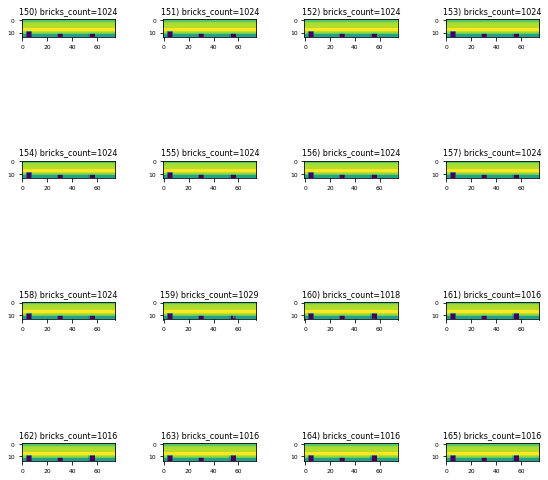

In [9]:
fig,axes = plt.subplots(4,4, figsize=(8,8))
fig.tight_layout()
for i in range(16):
    idx = 150+i
    obs_f = obs[idx,:,:,3]
    obs_s = obs_f[23:37,5:80]
    bricks_count = get_bricks_count(obs_s)
    axes[int(i/4),int(i%4)].imshow(obs_s)
    axes[int(i/4),int(i%4)].set_title('{}) bricks_count={}'.format(idx, bricks_count), fontsize=8)
    axes[int(i/4),int(i%4)].tick_params(axis='both', which='major', labelsize=6)

In [10]:
bricks_count = []
for i in range(obs.shape[0]):
    obs_f = obs[i,:,:,3]
    obs_s = obs_f[23:37,5:80]
    bc = get_bricks_count(obs_s)
    print('{}) bricks_count={}'.format(i, bc))
    bricks_count.append(bc)

np.save(os.path.join(exp_dir, "bricks_count.npy"), bricks_count)

0) bricks_count=1050
1) bricks_count=1050
2) bricks_count=1050
3) bricks_count=1050
4) bricks_count=1050
5) bricks_count=1050
6) bricks_count=1050
7) bricks_count=1050
8) bricks_count=1050
9) bricks_count=1050
10) bricks_count=1050
11) bricks_count=1050
12) bricks_count=1050
13) bricks_count=1050
14) bricks_count=1050
15) bricks_count=1050
16) bricks_count=1050
17) bricks_count=1050
18) bricks_count=1050
19) bricks_count=1050
20) bricks_count=1050
21) bricks_count=1050
22) bricks_count=1050
23) bricks_count=1050
24) bricks_count=1050
25) bricks_count=1050
26) bricks_count=1050
27) bricks_count=1050
28) bricks_count=1044
29) bricks_count=1044
30) bricks_count=1044
31) bricks_count=1044
32) bricks_count=1044
33) bricks_count=1044
34) bricks_count=1044
35) bricks_count=1044
36) bricks_count=1044
37) bricks_count=1044
38) bricks_count=1044
39) bricks_count=1044
40) bricks_count=1044
41) bricks_count=1044
42) bricks_count=1044
43) bricks_count=1044
44) bricks_count=1044
45) bricks_count=104

838) bricks_count=818
839) bricks_count=818
840) bricks_count=818
841) bricks_count=818
842) bricks_count=818
843) bricks_count=818
844) bricks_count=818
845) bricks_count=818
846) bricks_count=818
847) bricks_count=818
848) bricks_count=818
849) bricks_count=818
850) bricks_count=818
851) bricks_count=818
852) bricks_count=818
853) bricks_count=818
854) bricks_count=818
855) bricks_count=818
856) bricks_count=818
857) bricks_count=818
858) bricks_count=818
859) bricks_count=818
860) bricks_count=818
861) bricks_count=818
862) bricks_count=818
863) bricks_count=818
864) bricks_count=818
865) bricks_count=818
866) bricks_count=818
867) bricks_count=818
868) bricks_count=818
869) bricks_count=818
870) bricks_count=818
871) bricks_count=818
872) bricks_count=818
873) bricks_count=818
874) bricks_count=818
875) bricks_count=818
876) bricks_count=818
877) bricks_count=821
878) bricks_count=822
879) bricks_count=821
880) bricks_count=823
881) bricks_count=816
882) bricks_count=812
883) brick

1323) bricks_count=296
1324) bricks_count=289
1325) bricks_count=289
1326) bricks_count=289
1327) bricks_count=294
1328) bricks_count=298
1329) bricks_count=290
1330) bricks_count=288
1331) bricks_count=281
1332) bricks_count=281
1333) bricks_count=281
1334) bricks_count=286
1335) bricks_count=290
1336) bricks_count=280
1337) bricks_count=280
1338) bricks_count=273
1339) bricks_count=273
1340) bricks_count=273
1341) bricks_count=278
1342) bricks_count=282
1343) bricks_count=267
1344) bricks_count=263
1345) bricks_count=258
1346) bricks_count=258
1347) bricks_count=258
1348) bricks_count=263
1349) bricks_count=260
1350) bricks_count=253
1351) bricks_count=246
1352) bricks_count=246
1353) bricks_count=246
1354) bricks_count=251
1355) bricks_count=248
1356) bricks_count=238
1357) bricks_count=231
1358) bricks_count=231
1359) bricks_count=231
1360) bricks_count=236
1361) bricks_count=240
1362) bricks_count=240
1363) bricks_count=231
1364) bricks_count=231
1365) bricks_count=231
1366) brick

2360) bricks_count=44
2361) bricks_count=44
2362) bricks_count=44
2363) bricks_count=44
2364) bricks_count=44
2365) bricks_count=44
2366) bricks_count=44
2367) bricks_count=44
2368) bricks_count=44
2369) bricks_count=46
2370) bricks_count=51
2371) bricks_count=53
2372) bricks_count=46
2373) bricks_count=44
2374) bricks_count=44
2375) bricks_count=44
2376) bricks_count=53
2377) bricks_count=53
2378) bricks_count=49
2379) bricks_count=44
2380) bricks_count=44
2381) bricks_count=44
2382) bricks_count=44
2383) bricks_count=44
2384) bricks_count=44
2385) bricks_count=44
2386) bricks_count=44
2387) bricks_count=44
2388) bricks_count=44
2389) bricks_count=44
2390) bricks_count=44
2391) bricks_count=44
2392) bricks_count=46
2393) bricks_count=51
2394) bricks_count=53
2395) bricks_count=46
2396) bricks_count=44
2397) bricks_count=44
2398) bricks_count=44
2399) bricks_count=53
2400) bricks_count=51
2401) bricks_count=49
2402) bricks_count=44
2403) bricks_count=44
2404) bricks_count=44
2405) bric

2932) bricks_count=1008
2933) bricks_count=1008
2934) bricks_count=1008
2935) bricks_count=1008
2936) bricks_count=1008
2937) bricks_count=1008
2938) bricks_count=1008
2939) bricks_count=1008
2940) bricks_count=1008
2941) bricks_count=1008
2942) bricks_count=1008
2943) bricks_count=1008
2944) bricks_count=1008
2945) bricks_count=1008
2946) bricks_count=1008
2947) bricks_count=1008
2948) bricks_count=1008
2949) bricks_count=1008
2950) bricks_count=1008
2951) bricks_count=1008
2952) bricks_count=1008
2953) bricks_count=1008
2954) bricks_count=1008
2955) bricks_count=1008
2956) bricks_count=1008
2957) bricks_count=1008
2958) bricks_count=1008
2959) bricks_count=1008
2960) bricks_count=1008
2961) bricks_count=1008
2962) bricks_count=1008
2963) bricks_count=1008
2964) bricks_count=1008
2965) bricks_count=1001
2966) bricks_count=1000
2967) bricks_count=1000
2968) bricks_count=1000
2969) bricks_count=1000
2970) bricks_count=1000
2971) bricks_count=1000
2972) bricks_count=1000
2973) bricks_cou

3493) bricks_count=1044
3494) bricks_count=1044
3495) bricks_count=1044
3496) bricks_count=1044
3497) bricks_count=1044
3498) bricks_count=1044
3499) bricks_count=1044
3500) bricks_count=1044
3501) bricks_count=1044
3502) bricks_count=1044
3503) bricks_count=1044
3504) bricks_count=1044
3505) bricks_count=1044
3506) bricks_count=1044
3507) bricks_count=1044
3508) bricks_count=1044
3509) bricks_count=1044
3510) bricks_count=1044
3511) bricks_count=1044
3512) bricks_count=1044
3513) bricks_count=1036
3514) bricks_count=1036
3515) bricks_count=1036
3516) bricks_count=1036
3517) bricks_count=1036
3518) bricks_count=1036
3519) bricks_count=1036
3520) bricks_count=1036
3521) bricks_count=1036
3522) bricks_count=1036
3523) bricks_count=1036
3524) bricks_count=1036
3525) bricks_count=1036
3526) bricks_count=1036
3527) bricks_count=1036
3528) bricks_count=1036
3529) bricks_count=1036
3530) bricks_count=1036
3531) bricks_count=1036
3532) bricks_count=1036
3533) bricks_count=1036
3534) bricks_cou

4039) bricks_count=908
4040) bricks_count=908
4041) bricks_count=908
4042) bricks_count=908
4043) bricks_count=908
4044) bricks_count=908
4045) bricks_count=908
4046) bricks_count=908
4047) bricks_count=908
4048) bricks_count=908
4049) bricks_count=908
4050) bricks_count=908
4051) bricks_count=908
4052) bricks_count=908
4053) bricks_count=914
4054) bricks_count=904
4055) bricks_count=900
4056) bricks_count=900
4057) bricks_count=900
4058) bricks_count=900
4059) bricks_count=900
4060) bricks_count=900
4061) bricks_count=900
4062) bricks_count=900
4063) bricks_count=900
4064) bricks_count=900
4065) bricks_count=900
4066) bricks_count=900
4067) bricks_count=900
4068) bricks_count=900
4069) bricks_count=900
4070) bricks_count=900
4071) bricks_count=900
4072) bricks_count=900
4073) bricks_count=900
4074) bricks_count=900
4075) bricks_count=900
4076) bricks_count=900
4077) bricks_count=900
4078) bricks_count=908
4079) bricks_count=898
4080) bricks_count=890
4081) bricks_count=890
4082) brick

4657) bricks_count=638
4658) bricks_count=638
4659) bricks_count=638
4660) bricks_count=638
4661) bricks_count=638
4662) bricks_count=638
4663) bricks_count=638
4664) bricks_count=638
4665) bricks_count=638
4666) bricks_count=647
4667) bricks_count=645
4668) bricks_count=639
4669) bricks_count=635
4670) bricks_count=632
4671) bricks_count=632
4672) bricks_count=632
4673) bricks_count=632
4674) bricks_count=632
4675) bricks_count=632
4676) bricks_count=632
4677) bricks_count=632
4678) bricks_count=632
4679) bricks_count=632
4680) bricks_count=632
4681) bricks_count=632
4682) bricks_count=632
4683) bricks_count=632
4684) bricks_count=641
4685) bricks_count=639
4686) bricks_count=631
4687) bricks_count=632
4688) bricks_count=626
4689) bricks_count=626
4690) bricks_count=626
4691) bricks_count=626
4692) bricks_count=626
4693) bricks_count=626
4694) bricks_count=626
4695) bricks_count=626
4696) bricks_count=626
4697) bricks_count=626
4698) bricks_count=626
4699) bricks_count=626
4700) brick

5137) bricks_count=339
5138) bricks_count=337
5139) bricks_count=337
5140) bricks_count=337
5141) bricks_count=337
5142) bricks_count=337
5143) bricks_count=337
5144) bricks_count=337
5145) bricks_count=337
5146) bricks_count=337
5147) bricks_count=337
5148) bricks_count=337
5149) bricks_count=337
5150) bricks_count=337
5151) bricks_count=342
5152) bricks_count=344
5153) bricks_count=338
5154) bricks_count=331
5155) bricks_count=329
5156) bricks_count=329
5157) bricks_count=329
5158) bricks_count=329
5159) bricks_count=329
5160) bricks_count=329
5161) bricks_count=329
5162) bricks_count=329
5163) bricks_count=329
5164) bricks_count=329
5165) bricks_count=329
5166) bricks_count=329
5167) bricks_count=329
5168) bricks_count=334
5169) bricks_count=336
5170) bricks_count=321
5171) bricks_count=328
5172) bricks_count=321
5173) bricks_count=321
5174) bricks_count=321
5175) bricks_count=321
5176) bricks_count=321
5177) bricks_count=321
5178) bricks_count=321
5179) bricks_count=321
5180) brick

5516) bricks_count=223
5517) bricks_count=228
5518) bricks_count=227
5519) bricks_count=227
5520) bricks_count=225
5521) bricks_count=213
5522) bricks_count=205
5523) bricks_count=205
5524) bricks_count=205
5525) bricks_count=205
5526) bricks_count=205
5527) bricks_count=205
5528) bricks_count=205
5529) bricks_count=205
5530) bricks_count=205
5531) bricks_count=205
5532) bricks_count=205
5533) bricks_count=205
5534) bricks_count=205
5535) bricks_count=205
5536) bricks_count=205
5537) bricks_count=205
5538) bricks_count=205
5539) bricks_count=205
5540) bricks_count=205
5541) bricks_count=205
5542) bricks_count=205
5543) bricks_count=205
5544) bricks_count=205
5545) bricks_count=205
5546) bricks_count=205
5547) bricks_count=205
5548) bricks_count=205
5549) bricks_count=205
5550) bricks_count=205
5551) bricks_count=205
5552) bricks_count=205
5553) bricks_count=205
5554) bricks_count=205
5555) bricks_count=205
5556) bricks_count=205
5557) bricks_count=205
5558) bricks_count=205
5559) brick

6210) bricks_count=901
6211) bricks_count=901
6212) bricks_count=901
6213) bricks_count=901
6214) bricks_count=901
6215) bricks_count=901
6216) bricks_count=901
6217) bricks_count=901
6218) bricks_count=901
6219) bricks_count=901
6220) bricks_count=901
6221) bricks_count=901
6222) bricks_count=901
6223) bricks_count=901
6224) bricks_count=901
6225) bricks_count=901
6226) bricks_count=893
6227) bricks_count=893
6228) bricks_count=893
6229) bricks_count=893
6230) bricks_count=893
6231) bricks_count=893
6232) bricks_count=893
6233) bricks_count=893
6234) bricks_count=893
6235) bricks_count=893
6236) bricks_count=893
6237) bricks_count=893
6238) bricks_count=893
6239) bricks_count=893
6240) bricks_count=893
6241) bricks_count=893
6242) bricks_count=893
6243) bricks_count=893
6244) bricks_count=893
6245) bricks_count=893
6246) bricks_count=893
6247) bricks_count=893
6248) bricks_count=893
6249) bricks_count=899
6250) bricks_count=890
6251) bricks_count=885
6252) bricks_count=885
6253) brick

6577) bricks_count=769
6578) bricks_count=769
6579) bricks_count=769
6580) bricks_count=769
6581) bricks_count=769
6582) bricks_count=769
6583) bricks_count=769
6584) bricks_count=769
6585) bricks_count=769
6586) bricks_count=769
6587) bricks_count=769
6588) bricks_count=769
6589) bricks_count=771
6590) bricks_count=772
6591) bricks_count=770
6592) bricks_count=763
6593) bricks_count=763
6594) bricks_count=763
6595) bricks_count=763
6596) bricks_count=763
6597) bricks_count=763
6598) bricks_count=763
6599) bricks_count=763
6600) bricks_count=763
6601) bricks_count=763
6602) bricks_count=763
6603) bricks_count=763
6604) bricks_count=763
6605) bricks_count=763
6606) bricks_count=772
6607) bricks_count=755
6608) bricks_count=748
6609) bricks_count=748
6610) bricks_count=748
6611) bricks_count=748
6612) bricks_count=748
6613) bricks_count=748
6614) bricks_count=748
6615) bricks_count=748
6616) bricks_count=748
6617) bricks_count=748
6618) bricks_count=748
6619) bricks_count=748
6620) brick

7047) bricks_count=394
7048) bricks_count=394
7049) bricks_count=394
7050) bricks_count=394
7051) bricks_count=394
7052) bricks_count=394
7053) bricks_count=394
7054) bricks_count=394
7055) bricks_count=394
7056) bricks_count=394
7057) bricks_count=394
7058) bricks_count=394
7059) bricks_count=394
7060) bricks_count=394
7061) bricks_count=401
7062) bricks_count=401
7063) bricks_count=402
7064) bricks_count=394
7065) bricks_count=394
7066) bricks_count=394
7067) bricks_count=403
7068) bricks_count=394
7069) bricks_count=389
7070) bricks_count=382
7071) bricks_count=382
7072) bricks_count=382
7073) bricks_count=395
7074) bricks_count=382
7075) bricks_count=377
7076) bricks_count=370
7077) bricks_count=370
7078) bricks_count=370
7079) bricks_count=380
7080) bricks_count=375
7081) bricks_count=379
7082) bricks_count=370
7083) bricks_count=370
7084) bricks_count=370
7085) bricks_count=370
7086) bricks_count=370
7087) bricks_count=370
7088) bricks_count=370
7089) bricks_count=370
7090) brick

7655) bricks_count=36
7656) bricks_count=38
7657) bricks_count=36
7658) bricks_count=29
7659) bricks_count=29
7660) bricks_count=29
7661) bricks_count=32
7662) bricks_count=36
7663) bricks_count=36
7664) bricks_count=29
7665) bricks_count=29
7666) bricks_count=29
7667) bricks_count=29
7668) bricks_count=29
7669) bricks_count=29
7670) bricks_count=29
7671) bricks_count=29
7672) bricks_count=29
7673) bricks_count=29
7674) bricks_count=29
7675) bricks_count=29
7676) bricks_count=29
7677) bricks_count=29
7678) bricks_count=38
7679) bricks_count=38
7680) bricks_count=33
7681) bricks_count=29
7682) bricks_count=29
7683) bricks_count=29
7684) bricks_count=39
7685) bricks_count=36
7686) bricks_count=38
7687) bricks_count=29
7688) bricks_count=29
7689) bricks_count=29
7690) bricks_count=29
7691) bricks_count=29
7692) bricks_count=29
7693) bricks_count=29
7694) bricks_count=29
7695) bricks_count=29
7696) bricks_count=29
7697) bricks_count=29
7698) bricks_count=29
7699) bricks_count=29
7700) bric

8551) bricks_count=1000
8552) bricks_count=1000
8553) bricks_count=1000
8554) bricks_count=1000
8555) bricks_count=1000
8556) bricks_count=1000
8557) bricks_count=1000
8558) bricks_count=1000
8559) bricks_count=1000
8560) bricks_count=1000
8561) bricks_count=1000
8562) bricks_count=1000
8563) bricks_count=1000
8564) bricks_count=1000
8565) bricks_count=1000
8566) bricks_count=1000
8567) bricks_count=992
8568) bricks_count=992
8569) bricks_count=992
8570) bricks_count=992
8571) bricks_count=992
8572) bricks_count=992
8573) bricks_count=992
8574) bricks_count=992
8575) bricks_count=992
8576) bricks_count=992
8577) bricks_count=992
8578) bricks_count=992
8579) bricks_count=992
8580) bricks_count=992
8581) bricks_count=992
8582) bricks_count=992
8583) bricks_count=992
8584) bricks_count=992
8585) bricks_count=992
8586) bricks_count=992
8587) bricks_count=992
8588) bricks_count=992
8589) bricks_count=992
8590) bricks_count=992
8591) bricks_count=992
8592) bricks_count=992
8593) bricks_count

9476) bricks_count=563
9477) bricks_count=562
9478) bricks_count=555
9479) bricks_count=553
9480) bricks_count=553
9481) bricks_count=553
9482) bricks_count=557
9483) bricks_count=555
9484) bricks_count=544
9485) bricks_count=539
9486) bricks_count=539
9487) bricks_count=539
9488) bricks_count=543
9489) bricks_count=541
9490) bricks_count=534
9491) bricks_count=527
9492) bricks_count=527
9493) bricks_count=527
9494) bricks_count=531
9495) bricks_count=527
9496) bricks_count=517
9497) bricks_count=517
9498) bricks_count=517
9499) bricks_count=517
9500) bricks_count=524
9501) bricks_count=514
9502) bricks_count=505
9503) bricks_count=505
9504) bricks_count=505
9505) bricks_count=505
9506) bricks_count=512
9507) bricks_count=499
9508) bricks_count=497
9509) bricks_count=497
9510) bricks_count=497
9511) bricks_count=497
9512) bricks_count=504
9513) bricks_count=507
9514) bricks_count=504
9515) bricks_count=497
9516) bricks_count=497
9517) bricks_count=497
9518) bricks_count=497
9519) brick

10350) bricks_count=109
10351) bricks_count=109
10352) bricks_count=109
10353) bricks_count=116
10354) bricks_count=118
10355) bricks_count=116
10356) bricks_count=109
10357) bricks_count=109
10358) bricks_count=109
10359) bricks_count=109
10360) bricks_count=109
10361) bricks_count=109
10362) bricks_count=109
10363) bricks_count=109
10364) bricks_count=109
10365) bricks_count=109
10366) bricks_count=109
10367) bricks_count=109
10368) bricks_count=109
10369) bricks_count=109
10370) bricks_count=114
10371) bricks_count=94
10372) bricks_count=94
10373) bricks_count=94
10374) bricks_count=94
10375) bricks_count=94
10376) bricks_count=94
10377) bricks_count=94
10378) bricks_count=94
10379) bricks_count=94
10380) bricks_count=94
10381) bricks_count=94
10382) bricks_count=94
10383) bricks_count=94
10384) bricks_count=94
10385) bricks_count=99
10386) bricks_count=103
10387) bricks_count=103
10388) bricks_count=94
10389) bricks_count=94
10390) bricks_count=94
10391) bricks_count=96
10392) bric

11207) bricks_count=1016
11208) bricks_count=1016
11209) bricks_count=1016
11210) bricks_count=1010
11211) bricks_count=1010
11212) bricks_count=1010
11213) bricks_count=1010
11214) bricks_count=1010
11215) bricks_count=1010
11216) bricks_count=1010
11217) bricks_count=1010
11218) bricks_count=1010
11219) bricks_count=1010
11220) bricks_count=1010
11221) bricks_count=1010
11222) bricks_count=1010
11223) bricks_count=1010
11224) bricks_count=1010
11225) bricks_count=1010
11226) bricks_count=1010
11227) bricks_count=1010
11228) bricks_count=1010
11229) bricks_count=1010
11230) bricks_count=1010
11231) bricks_count=1010
11232) bricks_count=1010
11233) bricks_count=1012
11234) bricks_count=1006
11235) bricks_count=1004
11236) bricks_count=1004
11237) bricks_count=1004
11238) bricks_count=1004
11239) bricks_count=1004
11240) bricks_count=1004
11241) bricks_count=1004
11242) bricks_count=1004
11243) bricks_count=1004
11244) bricks_count=1004
11245) bricks_count=1004
11246) bricks_count=1004


11596) bricks_count=932
11597) bricks_count=918
11598) bricks_count=916
11599) bricks_count=916
11600) bricks_count=916
11601) bricks_count=916
11602) bricks_count=916
11603) bricks_count=916
11604) bricks_count=916
11605) bricks_count=916
11606) bricks_count=916
11607) bricks_count=916
11608) bricks_count=916
11609) bricks_count=916
11610) bricks_count=916
11611) bricks_count=916
11612) bricks_count=916
11613) bricks_count=916
11614) bricks_count=916
11615) bricks_count=916
11616) bricks_count=916
11617) bricks_count=916
11618) bricks_count=916
11619) bricks_count=916
11620) bricks_count=916
11621) bricks_count=905
11622) bricks_count=905
11623) bricks_count=905
11624) bricks_count=905
11625) bricks_count=905
11626) bricks_count=905
11627) bricks_count=905
11628) bricks_count=905
11629) bricks_count=905
11630) bricks_count=905
11631) bricks_count=905
11632) bricks_count=905
11633) bricks_count=905
11634) bricks_count=905
11635) bricks_count=905
11636) bricks_count=905
11637) bricks_co

11948) bricks_count=806
11949) bricks_count=809
11950) bricks_count=814
11951) bricks_count=802
11952) bricks_count=796
11953) bricks_count=794
11954) bricks_count=794
11955) bricks_count=794
11956) bricks_count=794
11957) bricks_count=794
11958) bricks_count=794
11959) bricks_count=794
11960) bricks_count=794
11961) bricks_count=794
11962) bricks_count=794
11963) bricks_count=794
11964) bricks_count=794
11965) bricks_count=794
11966) bricks_count=794
11967) bricks_count=794
11968) bricks_count=794
11969) bricks_count=794
11970) bricks_count=794
11971) bricks_count=794
11972) bricks_count=794
11973) bricks_count=794
11974) bricks_count=794
11975) bricks_count=794
11976) bricks_count=803
11977) bricks_count=799
11978) bricks_count=797
11979) bricks_count=791
11980) bricks_count=788
11981) bricks_count=788
11982) bricks_count=788
11983) bricks_count=788
11984) bricks_count=788
11985) bricks_count=788
11986) bricks_count=788
11987) bricks_count=788
11988) bricks_count=788
11989) bricks_co

12455) bricks_count=436
12456) bricks_count=436
12457) bricks_count=436
12458) bricks_count=436
12459) bricks_count=436
12460) bricks_count=436
12461) bricks_count=436
12462) bricks_count=436
12463) bricks_count=436
12464) bricks_count=436
12465) bricks_count=436
12466) bricks_count=436
12467) bricks_count=436
12468) bricks_count=436
12469) bricks_count=436
12470) bricks_count=436
12471) bricks_count=436
12472) bricks_count=436
12473) bricks_count=436
12474) bricks_count=436
12475) bricks_count=436
12476) bricks_count=436
12477) bricks_count=436
12478) bricks_count=436
12479) bricks_count=436
12480) bricks_count=436
12481) bricks_count=436
12482) bricks_count=436
12483) bricks_count=439
12484) bricks_count=444
12485) bricks_count=439
12486) bricks_count=429
12487) bricks_count=426
12488) bricks_count=421
12489) bricks_count=421
12490) bricks_count=421
12491) bricks_count=421
12492) bricks_count=421
12493) bricks_count=421
12494) bricks_count=421
12495) bricks_count=421
12496) bricks_co

13235) bricks_count=1044
13236) bricks_count=1044
13237) bricks_count=1044
13238) bricks_count=1044
13239) bricks_count=1044
13240) bricks_count=1044
13241) bricks_count=1044
13242) bricks_count=1047
13243) bricks_count=1045
13244) bricks_count=1038
13245) bricks_count=1038
13246) bricks_count=1038
13247) bricks_count=1038
13248) bricks_count=1038
13249) bricks_count=1038
13250) bricks_count=1038
13251) bricks_count=1038
13252) bricks_count=1038
13253) bricks_count=1038
13254) bricks_count=1038
13255) bricks_count=1038
13256) bricks_count=1038
13257) bricks_count=1038
13258) bricks_count=1038
13259) bricks_count=1038
13260) bricks_count=1038
13261) bricks_count=1038
13262) bricks_count=1038
13263) bricks_count=1038
13264) bricks_count=1038
13265) bricks_count=1038
13266) bricks_count=1038
13267) bricks_count=1038
13268) bricks_count=1038
13269) bricks_count=1038
13270) bricks_count=1038
13271) bricks_count=1038
13272) bricks_count=1038
13273) bricks_count=1038
13274) bricks_count=1038


13953) bricks_count=876
13954) bricks_count=876
13955) bricks_count=876
13956) bricks_count=876
13957) bricks_count=876
13958) bricks_count=876
13959) bricks_count=866
13960) bricks_count=866
13961) bricks_count=866
13962) bricks_count=866
13963) bricks_count=866
13964) bricks_count=866
13965) bricks_count=866
13966) bricks_count=866
13967) bricks_count=866
13968) bricks_count=866
13969) bricks_count=866
13970) bricks_count=866
13971) bricks_count=866
13972) bricks_count=866
13973) bricks_count=870
13974) bricks_count=869
13975) bricks_count=852
13976) bricks_count=852
13977) bricks_count=852
13978) bricks_count=852
13979) bricks_count=852
13980) bricks_count=852
13981) bricks_count=852
13982) bricks_count=852
13983) bricks_count=852
13984) bricks_count=852
13985) bricks_count=852
13986) bricks_count=852
13987) bricks_count=852
13988) bricks_count=852
13989) bricks_count=856
13990) bricks_count=840
13991) bricks_count=840
13992) bricks_count=840
13993) bricks_count=840
13994) bricks_co

15008) bricks_count=182
15009) bricks_count=182
15010) bricks_count=184
15011) bricks_count=195
15012) bricks_count=176
15013) bricks_count=172
15014) bricks_count=167
15015) bricks_count=167
15016) bricks_count=167
15017) bricks_count=174
15018) bricks_count=172
15019) bricks_count=166
15020) bricks_count=162
15021) bricks_count=157
15022) bricks_count=157
15023) bricks_count=157
15024) bricks_count=166
15025) bricks_count=166
15026) bricks_count=166
15027) bricks_count=157
15028) bricks_count=157
15029) bricks_count=157
15030) bricks_count=157
15031) bricks_count=157
15032) bricks_count=157
15033) bricks_count=157
15034) bricks_count=157
15035) bricks_count=157
15036) bricks_count=157
15037) bricks_count=157
15038) bricks_count=157
15039) bricks_count=157
15040) bricks_count=157
15041) bricks_count=164
15042) bricks_count=166
15043) bricks_count=162
15044) bricks_count=157
15045) bricks_count=157
15046) bricks_count=157
15047) bricks_count=164
15048) bricks_count=164
15049) bricks_co

16279) bricks_count=44
16280) bricks_count=44
16281) bricks_count=44
16282) bricks_count=44
16283) bricks_count=44
16284) bricks_count=44
16285) bricks_count=44
16286) bricks_count=44
16287) bricks_count=44
16288) bricks_count=44
16289) bricks_count=44
16290) bricks_count=44
16291) bricks_count=44
16292) bricks_count=44
16293) bricks_count=44
16294) bricks_count=44
16295) bricks_count=44
16296) bricks_count=48
16297) bricks_count=52
16298) bricks_count=52
16299) bricks_count=52
16300) bricks_count=46
16301) bricks_count=52
16302) bricks_count=52
16303) bricks_count=52
16304) bricks_count=52
16305) bricks_count=47
16306) bricks_count=44
16307) bricks_count=44
16308) bricks_count=44
16309) bricks_count=44
16310) bricks_count=44
16311) bricks_count=44
16312) bricks_count=44
16313) bricks_count=44
16314) bricks_count=44
16315) bricks_count=44
16316) bricks_count=44
16317) bricks_count=49
16318) bricks_count=48
16319) bricks_count=52
16320) bricks_count=52
16321) bricks_count=52
16322) bric

16741) bricks_count=1006
16742) bricks_count=1006
16743) bricks_count=1006
16744) bricks_count=1006
16745) bricks_count=1006
16746) bricks_count=1006
16747) bricks_count=1006
16748) bricks_count=1006
16749) bricks_count=1006
16750) bricks_count=1000
16751) bricks_count=1000
16752) bricks_count=1000
16753) bricks_count=1000
16754) bricks_count=1000
16755) bricks_count=1000
16756) bricks_count=1000
16757) bricks_count=1000
16758) bricks_count=1000
16759) bricks_count=1000
16760) bricks_count=1000
16761) bricks_count=1000
16762) bricks_count=1000
16763) bricks_count=1000
16764) bricks_count=994
16765) bricks_count=994
16766) bricks_count=994
16767) bricks_count=994
16768) bricks_count=994
16769) bricks_count=994
16770) bricks_count=994
16771) bricks_count=994
16772) bricks_count=994
16773) bricks_count=994
16774) bricks_count=994
16775) bricks_count=994
16776) bricks_count=994
16777) bricks_count=995
16778) bricks_count=984
16779) bricks_count=984
16780) bricks_count=984
16781) bricks_cou

17288) bricks_count=1050
17289) bricks_count=1050
17290) bricks_count=1050
17291) bricks_count=1050
17292) bricks_count=1050
17293) bricks_count=1050
17294) bricks_count=1050
17295) bricks_count=1050
17296) bricks_count=1050
17297) bricks_count=1050
17298) bricks_count=1050
17299) bricks_count=1050
17300) bricks_count=1050
17301) bricks_count=1050
17302) bricks_count=1050
17303) bricks_count=1050
17304) bricks_count=1050
17305) bricks_count=1050
17306) bricks_count=1050
17307) bricks_count=1050
17308) bricks_count=1050
17309) bricks_count=1050
17310) bricks_count=1050
17311) bricks_count=1050
17312) bricks_count=1050
17313) bricks_count=1050
17314) bricks_count=1050
17315) bricks_count=1050
17316) bricks_count=1044
17317) bricks_count=1044
17318) bricks_count=1044
17319) bricks_count=1044
17320) bricks_count=1044
17321) bricks_count=1044
17322) bricks_count=1044
17323) bricks_count=1044
17324) bricks_count=1044
17325) bricks_count=1044
17326) bricks_count=1044
17327) bricks_count=1044


18110) bricks_count=790
18111) bricks_count=790
18112) bricks_count=790
18113) bricks_count=790
18114) bricks_count=790
18115) bricks_count=795
18116) bricks_count=792
18117) bricks_count=788
18118) bricks_count=786
18119) bricks_count=784
18120) bricks_count=784
18121) bricks_count=784
18122) bricks_count=784
18123) bricks_count=784
18124) bricks_count=784
18125) bricks_count=784
18126) bricks_count=784
18127) bricks_count=784
18128) bricks_count=784
18129) bricks_count=784
18130) bricks_count=784
18131) bricks_count=784
18132) bricks_count=789
18133) bricks_count=791
18134) bricks_count=780
18135) bricks_count=785
18136) bricks_count=778
18137) bricks_count=778
18138) bricks_count=778
18139) bricks_count=778
18140) bricks_count=778
18141) bricks_count=778
18142) bricks_count=778
18143) bricks_count=778
18144) bricks_count=778
18145) bricks_count=778
18146) bricks_count=778
18147) bricks_count=778
18148) bricks_count=778
18149) bricks_count=778
18150) bricks_count=783
18151) bricks_co

18666) bricks_count=281
18667) bricks_count=279
18668) bricks_count=274
18669) bricks_count=274
18670) bricks_count=274
18671) bricks_count=281
18672) bricks_count=274
18673) bricks_count=267
18674) bricks_count=262
18675) bricks_count=262
18676) bricks_count=262
18677) bricks_count=269
18678) bricks_count=270
18679) bricks_count=269
18680) bricks_count=262
18681) bricks_count=262
18682) bricks_count=262
18683) bricks_count=262
18684) bricks_count=262
18685) bricks_count=262
18686) bricks_count=262
18687) bricks_count=262
18688) bricks_count=262
18689) bricks_count=262
18690) bricks_count=262
18691) bricks_count=262
18692) bricks_count=262
18693) bricks_count=262
18694) bricks_count=256
18695) bricks_count=256
18696) bricks_count=256
18697) bricks_count=256
18698) bricks_count=256
18699) bricks_count=256
18700) bricks_count=256
18701) bricks_count=256
18702) bricks_count=256
18703) bricks_count=256
18704) bricks_count=256
18705) bricks_count=256
18706) bricks_count=256
18707) bricks_co

19076) bricks_count=211
19077) bricks_count=208
19078) bricks_count=191
19079) bricks_count=186
19080) bricks_count=186
19081) bricks_count=186
19082) bricks_count=186
19083) bricks_count=186
19084) bricks_count=186
19085) bricks_count=186
19086) bricks_count=186
19087) bricks_count=186
19088) bricks_count=186
19089) bricks_count=186
19090) bricks_count=186
19091) bricks_count=186
19092) bricks_count=188
19093) bricks_count=195
19094) bricks_count=196
19095) bricks_count=186
19096) bricks_count=186
19097) bricks_count=186
19098) bricks_count=186
19099) bricks_count=195
19100) bricks_count=196
19101) bricks_count=190
19102) bricks_count=186
19103) bricks_count=186
19104) bricks_count=186
19105) bricks_count=186
19106) bricks_count=186
19107) bricks_count=186
19108) bricks_count=186
19109) bricks_count=186
19110) bricks_count=186
19111) bricks_count=186
19112) bricks_count=186
19113) bricks_count=186
19114) bricks_count=186
19115) bricks_count=188
19116) bricks_count=183
19117) bricks_co

19523) bricks_count=108
19524) bricks_count=108
19525) bricks_count=108
19526) bricks_count=117
19527) bricks_count=118
19528) bricks_count=115
19529) bricks_count=108
19530) bricks_count=108
19531) bricks_count=108
19532) bricks_count=108
19533) bricks_count=108
19534) bricks_count=108
19535) bricks_count=108
19536) bricks_count=108
19537) bricks_count=108
19538) bricks_count=108
19539) bricks_count=108
19540) bricks_count=108
19541) bricks_count=108
19542) bricks_count=110
19543) bricks_count=117
19544) bricks_count=118
19545) bricks_count=108
19546) bricks_count=108
19547) bricks_count=108
19548) bricks_count=108
19549) bricks_count=117
19550) bricks_count=118
19551) bricks_count=115
19552) bricks_count=108
19553) bricks_count=108
19554) bricks_count=108
19555) bricks_count=108
19556) bricks_count=108
19557) bricks_count=108
19558) bricks_count=108
19559) bricks_count=108
19560) bricks_count=108
19561) bricks_count=108
19562) bricks_count=108
19563) bricks_count=108
19564) bricks_co

20183) bricks_count=108
20184) bricks_count=108
20185) bricks_count=108
20186) bricks_count=110
20187) bricks_count=117
20188) bricks_count=118
20189) bricks_count=108
20190) bricks_count=108
20191) bricks_count=108
20192) bricks_count=108
20193) bricks_count=117
20194) bricks_count=118
20195) bricks_count=115
20196) bricks_count=108
20197) bricks_count=108
20198) bricks_count=108
20199) bricks_count=108
20200) bricks_count=108
20201) bricks_count=108
20202) bricks_count=108
20203) bricks_count=108
20204) bricks_count=108
20205) bricks_count=108
20206) bricks_count=108
20207) bricks_count=108
20208) bricks_count=108
20209) bricks_count=110
20210) bricks_count=117
20211) bricks_count=120
20212) bricks_count=108
20213) bricks_count=108
20214) bricks_count=108
20215) bricks_count=108
20216) bricks_count=117
20217) bricks_count=118
20218) bricks_count=115
20219) bricks_count=108
20220) bricks_count=108
20221) bricks_count=108
20222) bricks_count=108
20223) bricks_count=108
20224) bricks_co

20836) bricks_count=80
20837) bricks_count=77
20838) bricks_count=82
20839) bricks_count=82
20840) bricks_count=82
20841) bricks_count=80
20842) bricks_count=79
20843) bricks_count=74
20844) bricks_count=74
20845) bricks_count=74
20846) bricks_count=74
20847) bricks_count=74
20848) bricks_count=74
20849) bricks_count=74
20850) bricks_count=74
20851) bricks_count=74
20852) bricks_count=74
20853) bricks_count=74
20854) bricks_count=77
20855) bricks_count=77
20856) bricks_count=82
20857) bricks_count=82
20858) bricks_count=82
20859) bricks_count=80
20860) bricks_count=82
20861) bricks_count=82
20862) bricks_count=82
20863) bricks_count=77
20864) bricks_count=74
20865) bricks_count=74
20866) bricks_count=74
20867) bricks_count=74
20868) bricks_count=74
20869) bricks_count=74
20870) bricks_count=74
20871) bricks_count=74
20872) bricks_count=74
20873) bricks_count=74
20874) bricks_count=74
20875) bricks_count=74
20876) bricks_count=74
20877) bricks_count=74
20878) bricks_count=74
20879) bric

21333) bricks_count=44
21334) bricks_count=44
21335) bricks_count=46
21336) bricks_count=52
21337) bricks_count=51
21338) bricks_count=51
21339) bricks_count=52
21340) bricks_count=46
21341) bricks_count=44
21342) bricks_count=44
21343) bricks_count=44
21344) bricks_count=44
21345) bricks_count=44
21346) bricks_count=51
21347) bricks_count=51
21348) bricks_count=52
21349) bricks_count=54
21350) bricks_count=45
21351) bricks_count=44
21352) bricks_count=44
21353) bricks_count=44
21354) bricks_count=44
21355) bricks_count=44
21356) bricks_count=44
21357) bricks_count=44
21358) bricks_count=44
21359) bricks_count=44
21360) bricks_count=44
21361) bricks_count=44
21362) bricks_count=44
21363) bricks_count=44
21364) bricks_count=44
21365) bricks_count=44
21366) bricks_count=44
21367) bricks_count=44
21368) bricks_count=44
21369) bricks_count=44
21370) bricks_count=44
21371) bricks_count=44
21372) bricks_count=44
21373) bricks_count=44
21374) bricks_count=29
21375) bricks_count=29
21376) bric

22126) bricks_count=834
22127) bricks_count=834
22128) bricks_count=834
22129) bricks_count=834
22130) bricks_count=834
22131) bricks_count=834
22132) bricks_count=834
22133) bricks_count=834
22134) bricks_count=834
22135) bricks_count=834
22136) bricks_count=834
22137) bricks_count=834
22138) bricks_count=834
22139) bricks_count=834
22140) bricks_count=834
22141) bricks_count=834
22142) bricks_count=834
22143) bricks_count=834
22144) bricks_count=834
22145) bricks_count=834
22146) bricks_count=834
22147) bricks_count=834
22148) bricks_count=834
22149) bricks_count=834
22150) bricks_count=834
22151) bricks_count=834
22152) bricks_count=834
22153) bricks_count=834
22154) bricks_count=834
22155) bricks_count=834
22156) bricks_count=834
22157) bricks_count=834
22158) bricks_count=834
22159) bricks_count=834
22160) bricks_count=834
22161) bricks_count=834
22162) bricks_count=834
22163) bricks_count=834
22164) bricks_count=834
22165) bricks_count=834
22166) bricks_count=837
22167) bricks_co

22817) bricks_count=543
22818) bricks_count=542
22819) bricks_count=530
22820) bricks_count=530
22821) bricks_count=530
22822) bricks_count=530
22823) bricks_count=532
22824) bricks_count=524
22825) bricks_count=524
22826) bricks_count=524
22827) bricks_count=524
22828) bricks_count=524
22829) bricks_count=516
22830) bricks_count=516
22831) bricks_count=516
22832) bricks_count=516
22833) bricks_count=506
22834) bricks_count=506
22835) bricks_count=506
22836) bricks_count=506
22837) bricks_count=495
22838) bricks_count=495
22839) bricks_count=495
22840) bricks_count=495
22841) bricks_count=496
22842) bricks_count=492
22843) bricks_count=491
22844) bricks_count=491
22845) bricks_count=491
22846) bricks_count=492
22847) bricks_count=491
22848) bricks_count=485
22849) bricks_count=485
22850) bricks_count=485
22851) bricks_count=485
22852) bricks_count=490
22853) bricks_count=480
22854) bricks_count=480
22855) bricks_count=480
22856) bricks_count=480
22857) bricks_count=480
22858) bricks_co

23443) bricks_count=986
23444) bricks_count=986
23445) bricks_count=986
23446) bricks_count=986
23447) bricks_count=986
23448) bricks_count=986
23449) bricks_count=986
23450) bricks_count=986
23451) bricks_count=986
23452) bricks_count=986
23453) bricks_count=986
23454) bricks_count=986
23455) bricks_count=986
23456) bricks_count=986
23457) bricks_count=986
23458) bricks_count=986
23459) bricks_count=986
23460) bricks_count=989
23461) bricks_count=993
23462) bricks_count=980
23463) bricks_count=978
23464) bricks_count=978
23465) bricks_count=978
23466) bricks_count=978
23467) bricks_count=978
23468) bricks_count=978
23469) bricks_count=978
23470) bricks_count=978
23471) bricks_count=978
23472) bricks_count=978
23473) bricks_count=978
23474) bricks_count=978
23475) bricks_count=978
23476) bricks_count=978
23477) bricks_count=978
23478) bricks_count=978
23479) bricks_count=978
23480) bricks_count=978
23481) bricks_count=978
23482) bricks_count=978
23483) bricks_count=978
23484) bricks_co

23924) bricks_count=820
23925) bricks_count=820
23926) bricks_count=820
23927) bricks_count=820
23928) bricks_count=820
23929) bricks_count=820
23930) bricks_count=815
23931) bricks_count=815
23932) bricks_count=815
23933) bricks_count=815
23934) bricks_count=815
23935) bricks_count=815
23936) bricks_count=815
23937) bricks_count=815
23938) bricks_count=815
23939) bricks_count=815
23940) bricks_count=815
23941) bricks_count=815
23942) bricks_count=815
23943) bricks_count=815
23944) bricks_count=822
23945) bricks_count=807
23946) bricks_count=800
23947) bricks_count=800
23948) bricks_count=800
23949) bricks_count=800
23950) bricks_count=800
23951) bricks_count=800
23952) bricks_count=800
23953) bricks_count=800
23954) bricks_count=800
23955) bricks_count=800
23956) bricks_count=800
23957) bricks_count=800
23958) bricks_count=800
23959) bricks_count=800
23960) bricks_count=807
23961) bricks_count=803
23962) bricks_count=795
23963) bricks_count=792
23964) bricks_count=792
23965) bricks_co

24340) bricks_count=619
24341) bricks_count=619
24342) bricks_count=619
24343) bricks_count=619
24344) bricks_count=619
24345) bricks_count=619
24346) bricks_count=619
24347) bricks_count=621
24348) bricks_count=628
24349) bricks_count=619
24350) bricks_count=620
24351) bricks_count=611
24352) bricks_count=611
24353) bricks_count=611
24354) bricks_count=611
24355) bricks_count=611
24356) bricks_count=611
24357) bricks_count=611
24358) bricks_count=611
24359) bricks_count=611
24360) bricks_count=611
24361) bricks_count=611
24362) bricks_count=611
24363) bricks_count=611
24364) bricks_count=611
24365) bricks_count=614
24366) bricks_count=620
24367) bricks_count=614
24368) bricks_count=614
24369) bricks_count=607
24370) bricks_count=602
24371) bricks_count=602
24372) bricks_count=602
24373) bricks_count=602
24374) bricks_count=602
24375) bricks_count=602
24376) bricks_count=602
24377) bricks_count=602
24378) bricks_count=602
24379) bricks_count=602
24380) bricks_count=602
24381) bricks_co

24785) bricks_count=177
24786) bricks_count=177
24787) bricks_count=177
24788) bricks_count=177
24789) bricks_count=177
24790) bricks_count=177
24791) bricks_count=177
24792) bricks_count=184
24793) bricks_count=182
24794) bricks_count=168
24795) bricks_count=162
24796) bricks_count=162
24797) bricks_count=162
24798) bricks_count=162
24799) bricks_count=162
24800) bricks_count=162
24801) bricks_count=162
24802) bricks_count=162
24803) bricks_count=162
24804) bricks_count=162
24805) bricks_count=162
24806) bricks_count=162
24807) bricks_count=162
24808) bricks_count=162
24809) bricks_count=171
24810) bricks_count=154
24811) bricks_count=152
24812) bricks_count=152
24813) bricks_count=152
24814) bricks_count=152
24815) bricks_count=152
24816) bricks_count=152
24817) bricks_count=152
24818) bricks_count=152
24819) bricks_count=152
24820) bricks_count=152
24821) bricks_count=152
24822) bricks_count=152
24823) bricks_count=152
24824) bricks_count=152
24825) bricks_count=154
24826) bricks_co

25214) bricks_count=41
25215) bricks_count=41
25216) bricks_count=41
25217) bricks_count=44
25218) bricks_count=47
25219) bricks_count=43
25220) bricks_count=47
25221) bricks_count=47
25222) bricks_count=49
25223) bricks_count=44
25224) bricks_count=41
25225) bricks_count=41
25226) bricks_count=41
25227) bricks_count=41
25228) bricks_count=41
25229) bricks_count=41
25230) bricks_count=41
25231) bricks_count=45
25232) bricks_count=49
25233) bricks_count=41
25234) bricks_count=35
25235) bricks_count=29
25236) bricks_count=29
25237) bricks_count=29
25238) bricks_count=31
25239) bricks_count=37
25240) bricks_count=36
25241) bricks_count=29
25242) bricks_count=29
25243) bricks_count=29
25244) bricks_count=29
25245) bricks_count=29
25246) bricks_count=29
25247) bricks_count=29
25248) bricks_count=29
25249) bricks_count=29
25250) bricks_count=29
25251) bricks_count=29
25252) bricks_count=29
25253) bricks_count=29
25254) bricks_count=29
25255) bricks_count=31
25256) bricks_count=37
25257) bric

25588) bricks_count=1016
25589) bricks_count=1016
25590) bricks_count=1016
25591) bricks_count=1016
25592) bricks_count=1018
25593) bricks_count=1022
25594) bricks_count=1010
25595) bricks_count=1007
25596) bricks_count=1007
25597) bricks_count=1007
25598) bricks_count=1007
25599) bricks_count=1007
25600) bricks_count=1007
25601) bricks_count=1007
25602) bricks_count=1007
25603) bricks_count=1007
25604) bricks_count=1007
25605) bricks_count=1007
25606) bricks_count=1007
25607) bricks_count=1007
25608) bricks_count=1007
25609) bricks_count=1007
25610) bricks_count=1007
25611) bricks_count=1007
25612) bricks_count=1007
25613) bricks_count=1007
25614) bricks_count=1007
25615) bricks_count=1007
25616) bricks_count=1007
25617) bricks_count=1007
25618) bricks_count=1007
25619) bricks_count=1015
25620) bricks_count=1012
25621) bricks_count=1001
25622) bricks_count=1001
25623) bricks_count=1001
25624) bricks_count=1001
25625) bricks_count=1001
25626) bricks_count=1001
25627) bricks_count=1001


26118) bricks_count=881
26119) bricks_count=881
26120) bricks_count=881
26121) bricks_count=881
26122) bricks_count=881
26123) bricks_count=881
26124) bricks_count=881
26125) bricks_count=881
26126) bricks_count=881
26127) bricks_count=881
26128) bricks_count=881
26129) bricks_count=881
26130) bricks_count=881
26131) bricks_count=881
26132) bricks_count=881
26133) bricks_count=881
26134) bricks_count=881
26135) bricks_count=881
26136) bricks_count=886
26137) bricks_count=889
26138) bricks_count=885
26139) bricks_count=881
26140) bricks_count=875
26141) bricks_count=875
26142) bricks_count=875
26143) bricks_count=875
26144) bricks_count=875
26145) bricks_count=875
26146) bricks_count=875
26147) bricks_count=875
26148) bricks_count=875
26149) bricks_count=875
26150) bricks_count=875
26151) bricks_count=875
26152) bricks_count=875
26153) bricks_count=875
26154) bricks_count=875
26155) bricks_count=869
26156) bricks_count=869
26157) bricks_count=869
26158) bricks_count=869
26159) bricks_co

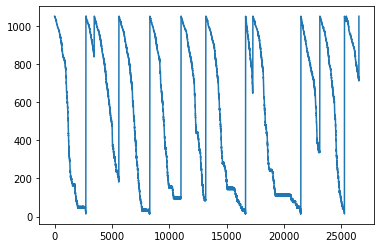

In [11]:
fig,ax = plt.subplots()
plt.plot(bricks_count)
plt.show()